### Project - Global Mortality (WHO)

#### Data Overview

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

import warnings 

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("mortality_data_final.csv")

In [3]:
df.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,Cause_Name,Country_name
0,1400,NaN,NaN,2021,101,1000,1,7,1,481,...,NaN,NaN,NaN,0.0,0.0,5.0,1.0,2.0,All causes,Seychelles
1,1400,NaN,NaN,2021,101,1000,2,7,1,444,...,NaN,NaN,NaN,0.0,1.0,3.0,4.0,3.0,All causes,Seychelles
2,1400,NaN,NaN,2021,101,1001,1,7,1,14,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,Certain infectious and parasitic diseases,Seychelles
3,1400,NaN,NaN,2021,101,1001,2,7,1,8,...,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,Certain infectious and parasitic diseases,Seychelles
4,1400,NaN,NaN,2021,101,1002,1,7,1,0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Cholera,Seychelles


In [4]:
df.describe()

,Country,Admin1,Year,List,Sex,Frmat,IM_Frmat,Deaths1,Deaths2,Deaths3,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
count,369240.000000,0.0,369240.000000,369240.000000,369240.000000,369240.000000,369240.000000,3.692400e+05,361986.000000,361986.000000,...,361986.000000,359237.000000,359237.000000,311364.000000,311364.000000,356731.000000,361986.000000,311397.000000,317456.000000,317456.000000
mean,3441.152540,NaN,2021.617574,103.957123,1.504344,0.403824,2.017769,1.628278e+02,1.443818,0.136047,...,19.663258,22.753892,26.961610,18.390565,9.186084,0.128312,0.565624,0.306194,0.235160,0.465869
std,940.279249,NaN,0.704225,0.233021,0.667894,1.368877,2.479366,7.148212e+03,67.813146,5.927158,...,855.948895,924.677491,1096.403499,833.515060,508.259553,11.948032,37.579153,15.395594,10.947451,21.814247
min,1030.000000,NaN,2021.000000,101.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2380.000000,NaN,2021.000000,104.000000,1.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4010.000000,NaN,2021.000000,104.000000,1.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4210.000000,NaN,2022.000000,104.000000,2.000000,0.000000,1.000000,1.200000e+01,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5195.000000,NaN,2023.000000,104.000000,9.000000,9.000000,9.000000,1.838108e+06,17618.000000,1178.000000,...,220245.000000,212144.000000,225125.000000,206361.000000,138231.000000,3253.000000,10864.000000,5011.000000,3192.000000,5064.000000


#### Data Preprocessing and Transformation

In [5]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)

              Missing Values  Percentage
Country                    0    0.000000
Admin1                369240  100.000000
SubDiv                368405   99.773860
Year                       0    0.000000
List                       0    0.000000
Cause                      0    0.000000
Sex                        0    0.000000
Frmat                      0    0.000000
IM_Frmat                   0    0.000000
Deaths1                    0    0.000000
Deaths2                 7254    1.964576
Deaths3                 7254    1.964576
Deaths4                34353    9.303705
Deaths5                34353    9.303705
Deaths6                34353    9.303705
Deaths7                 7254    1.964576
Deaths8                 7455    2.019012
Deaths9                 7254    1.964576
Deaths10                7455    2.019012
Deaths11                7254    1.964576
Deaths12                7455    2.019012
Deaths13                7254    1.964576
Deaths14                7455    2.019012
Deaths15        

#### Explanation of handling missing data in IM_Death:

The reason for filtering out the records where **IM_Deaths1** is missing and **IM_Frmat** is 9 is based on the dataset's documentation. According to the documentation:

- **IM_Frmat = 9** represents a format where data is intentionally missing. This means that for these rows, it is not appropriate to perform any imputation, as the absence of data is part of the dataset's structure and not due to missing values that can be inferred.
  
- Similarly, if **IM_Deaths1** is missing, it indicates that the data for these specific death counts is unavailable for these records. Since this data is missing from the dataset, it is not possible to impute these values. Therefore, we exclude these rows to ensure that any imputation or distribution applied later is done only on valid and meaningful data.

By removing these rows, we avoid introducing inaccurate or biased imputations, keeping the integrity of the dataset intact while following the guidelines outlined in the documentation.


In [6]:
df['Frmat'].value_counts()

Frmat
0    311364
2     26103
1     21770
9      7254
3      1753
4       795
7       201
Name: count, dtype: int64

#### Explanation of handling missing data in IM_Death:

The missing values in the deaths columns arise not from a lack of data, but due to the dataset being recorded in multiple formats. Format 0, which contains over 90% of the records, provides detailed death distributions across age groups, while other formats (1, 2, etc.) aggregate age groups, leading to missing values in their death columns.

Here’s the approach used to handle this:

- **Format 0 as Reference:** It offers the most reliable and detailed death distribution.
- **Proportional Distribution:** We calculated death proportions in Format 0 to reflect how deaths are spread across age groups.
- **Distributing Deaths:** For non-Format 0 rows, I distributed the total deaths based on Format 0's proportions.

This method ensures consistency and follows the documentation, leveraging Format 0’s detailed breakdown while maintaining data integrity.


In [7]:
import numpy as np

# Compute percentage distribution of deaths per column in Format 0 (excluding IM_Deaths columns)
death_cols = [col for col in df.columns if 'Deaths' in col and 'IM_Deaths' not in col and col not in ['Deaths1', 'Deaths2']]
format_0_dist = df[df['Frmat'] == 0][death_cols].sum()
format_0_dist = format_0_dist / format_0_dist.sum()  # Normalize to get proportions

# Function to distribute deaths in other formats based on Format 0 proportions
def distribute_deaths(row):
    if row['Frmat'] != 0:  # Apply only to non-Format 0 rows
        total_deaths = row[death_cols].sum()
        row[death_cols] = np.floor(total_deaths * format_0_dist)  # Split based on format 0 ratios and floor values
        
    return row

# Apply the distribution function to the DataFrame
df = df.apply(distribute_deaths, axis=1)

# Remove rows with missing value in Deaths2
df = df.dropna(subset=['Deaths2'])


In [8]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)


              Missing Values  Percentage
Country                    0    0.000000
Admin1                361986  100.000000
SubDiv                361151   99.769328
Year                       0    0.000000
List                       0    0.000000
Cause                      0    0.000000
Sex                        0    0.000000
Frmat                      0    0.000000
IM_Frmat                   0    0.000000
Deaths1                    0    0.000000
Deaths2                    0    0.000000
Deaths3                    0    0.000000
Deaths4                    0    0.000000
Deaths5                    0    0.000000
Deaths6                    0    0.000000
Deaths7                    0    0.000000
Deaths8                    0    0.000000
Deaths9                    0    0.000000
Deaths10                   0    0.000000
Deaths11                   0    0.000000
Deaths12                   0    0.000000
Deaths13                   0    0.000000
Deaths14                   0    0.000000
Deaths15        

In [9]:
# Dropping columns with high percentage of missing values
df.drop(columns=['Admin1', 'SubDiv'], inplace=True)


Since **Admin1** and **SubDiv** columns have a very high percentage of missing values (100% and 99.77% respectively), they are not contributing meaningful information to the dataset. Therefore, I have decided to drop these columns to avoid including data that could negatively impact the model's performance.

The columns **Admin1** and **SubDiv** are dropped due to their high proportion of missing values, which makes them unreliable for analysis and model training.


In [10]:
# Drop rows where any of the specified columns have missing values
columns_to_check = ['IM_Deaths2', 'IM_Deaths3', 'IM_Deaths4']
df = df.dropna(subset=columns_to_check)


In [11]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)


              Missing Values  Percentage
Country                    0     0.00000
Year                       0     0.00000
List                       0     0.00000
Cause                      0     0.00000
Sex                        0     0.00000
Frmat                      0     0.00000
IM_Frmat                   0     0.00000
Deaths1                    0     0.00000
Deaths2                    0     0.00000
Deaths3                    0     0.00000
Deaths4                    0     0.00000
Deaths5                    0     0.00000
Deaths6                    0     0.00000
Deaths7                    0     0.00000
Deaths8                    0     0.00000
Deaths9                    0     0.00000
Deaths10                   0     0.00000
Deaths11                   0     0.00000
Deaths12                   0     0.00000
Deaths13                   0     0.00000
Deaths14                   0     0.00000
Deaths15                   0     0.00000
Deaths16                   0     0.00000
Deaths17        

#### Data Transformation (Encoding, Normalisation)

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

df_copy = df.copy()

# Dropping unnecessary columns
df_copy = df_copy.drop(["Country_name", "Cause_Name"], axis=1)


In [13]:
df_copy

,Country,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,Deaths2,Deaths3,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,1400,2021,101,1000,1,7,1,481,8.0,0.0,...,57.0,65.0,66.0,50.0,25.0,0.0,0.0,5.0,1.0,2.0
1,1400,2021,101,1000,2,7,1,444,11.0,0.0,...,52.0,59.0,61.0,46.0,22.0,0.0,1.0,3.0,4.0,3.0
2,1400,2021,101,1001,1,7,1,14,1.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1400,2021,101,1001,2,7,1,8,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1400,2021,101,1002,1,7,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369235,5020,2023,104,Y86,2,0,1,38,0.0,0.0,...,4.0,7.0,8.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0
369236,5020,2023,104,Y881,1,0,1,2,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
369237,5020,2023,104,Y883,1,0,1,5,0.0,0.0,...,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
369238,5020,2023,104,Y883,2,0,1,1,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Categorical column to one-hot encode
categorical_cols = ["Sex"]

# One-hot encoding for 'Sex'
encoder = OneHotEncoder(drop="first", sparse_output=False)  # Avoiding dummy variable trap
encoded_sex = encoder.fit_transform(df_copy[categorical_cols])

# Creating DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_sex, columns=encoder.get_feature_names_out(categorical_cols))

# Drop the original 'Sex' column from df_copy
df_copy = df_copy.drop(columns=categorical_cols)

from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical = ['Cause']

# Apply Label Encoding
label_encoders = {}
for col in categorical:
    le = LabelEncoder()
    df_copy[col] = le.fit_transform(df_copy[col])
    label_encoders[col] = le  # Store the encoder for inverse transformations if needed

# Verify encoding
print(df_copy[categorical].head())

   Cause
0      0
1      0
2      1
3      1
4      2


In [15]:
# Select numerical columns with float and int64 data types, excluding 'Frmat' and 'IM_Frmat'
numerical_cols = df_copy.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Exclude 'Frmat' and 'IM_Frmat' from the list of numerical columns
numerical_cols = [col for col in numerical_cols if col not in ['Frmat', 'IM_Frmat']]

# Now you can proceed with scaling these numerical columns
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_copy[numerical_cols])
scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)

# Merge encoded and scaled data
df_copy = pd.concat([scaled_df, encoded_df], axis=1)


In [16]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311397 entries, 0 to 311396
Data columns (total 35 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Country     311397 non-null  float64
 1   Year        311397 non-null  float64
 2   List        311397 non-null  float64
 3   Deaths1     311397 non-null  float64
 4   Deaths2     311397 non-null  float64
 5   Deaths3     311397 non-null  float64
 6   Deaths4     311397 non-null  float64
 7   Deaths5     311397 non-null  float64
 8   Deaths6     311397 non-null  float64
 9   Deaths7     311397 non-null  float64
 10  Deaths8     311397 non-null  float64
 11  Deaths9     311397 non-null  float64
 12  Deaths10    311397 non-null  float64
 13  Deaths11    311397 non-null  float64
 14  Deaths12    311397 non-null  float64
 15  Deaths13    311397 non-null  float64
 16  Deaths14    311397 non-null  float64
 17  Deaths15    311397 non-null  float64
 18  Deaths16    311397 non-null  float64
 19  De

In [17]:
df_copy.isnull().sum()

Country       0
Year          0
List          0
Deaths1       0
Deaths2       0
Deaths3       0
Deaths4       0
Deaths5       0
Deaths6       0
Deaths7       0
Deaths8       0
Deaths9       0
Deaths10      0
Deaths11      0
Deaths12      0
Deaths13      0
Deaths14      0
Deaths15      0
Deaths16      0
Deaths17      0
Deaths18      0
Deaths19      0
Deaths20      0
Deaths21      0
Deaths22      0
Deaths23      0
Deaths24      0
Deaths25      0
Deaths26      0
IM_Deaths1    0
IM_Deaths2    0
IM_Deaths3    0
IM_Deaths4    0
Sex_2         0
Sex_9         0
dtype: int64

#### Exploratory Data Analysis (EDA)

#### Top 10 Causes of Death

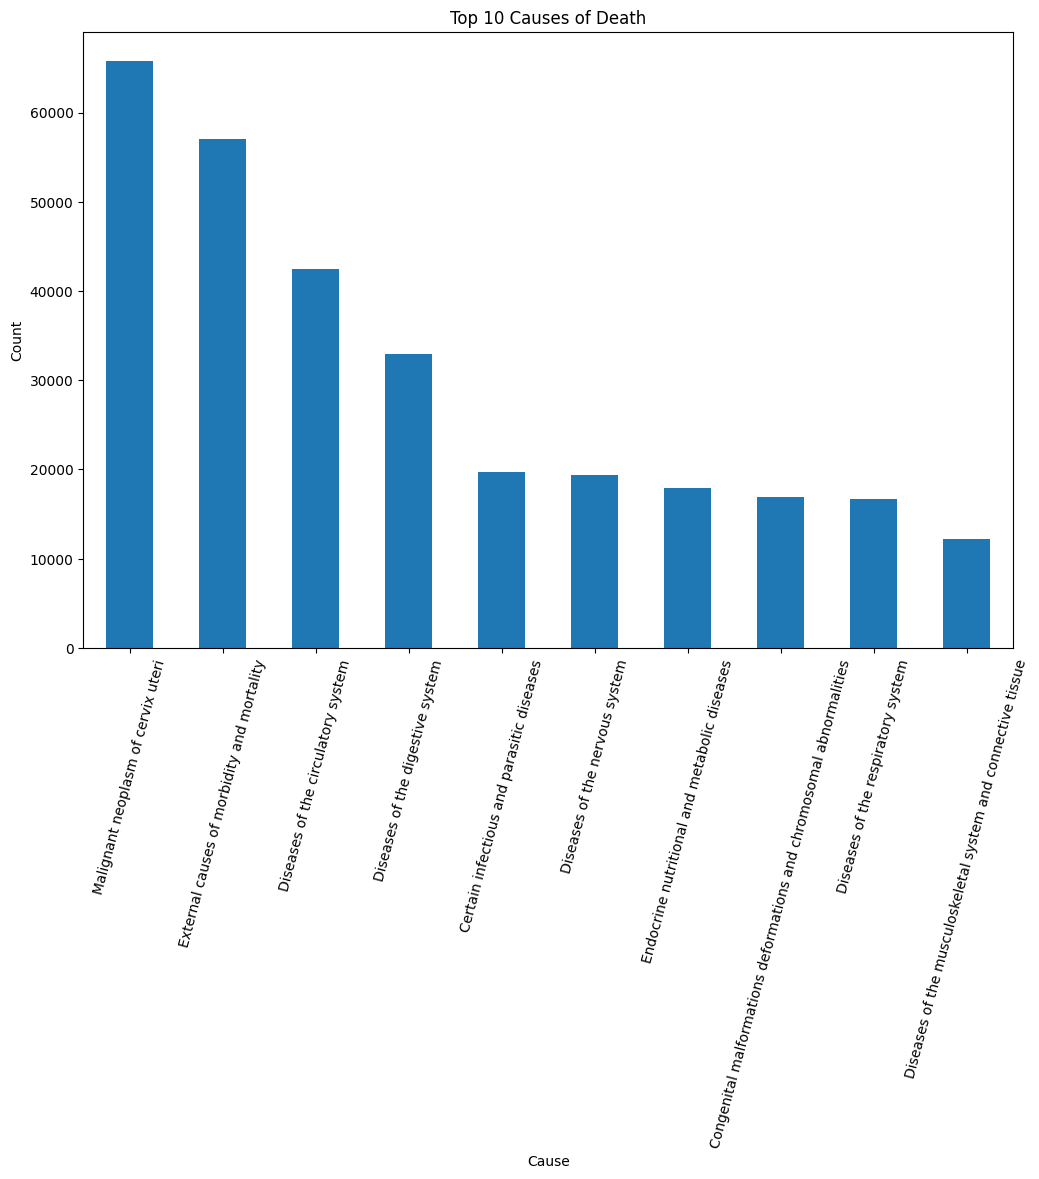

In [17]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 8))

top_causes = df['Cause_Name'].value_counts().head(10)
top_causes.plot(kind='bar', title="Top 10 Causes of Death")
plt.xlabel("Cause")
plt.ylabel("Count")
plt.xticks(rotation=75)
plt.show()


#### Distribution of Deaths by Year

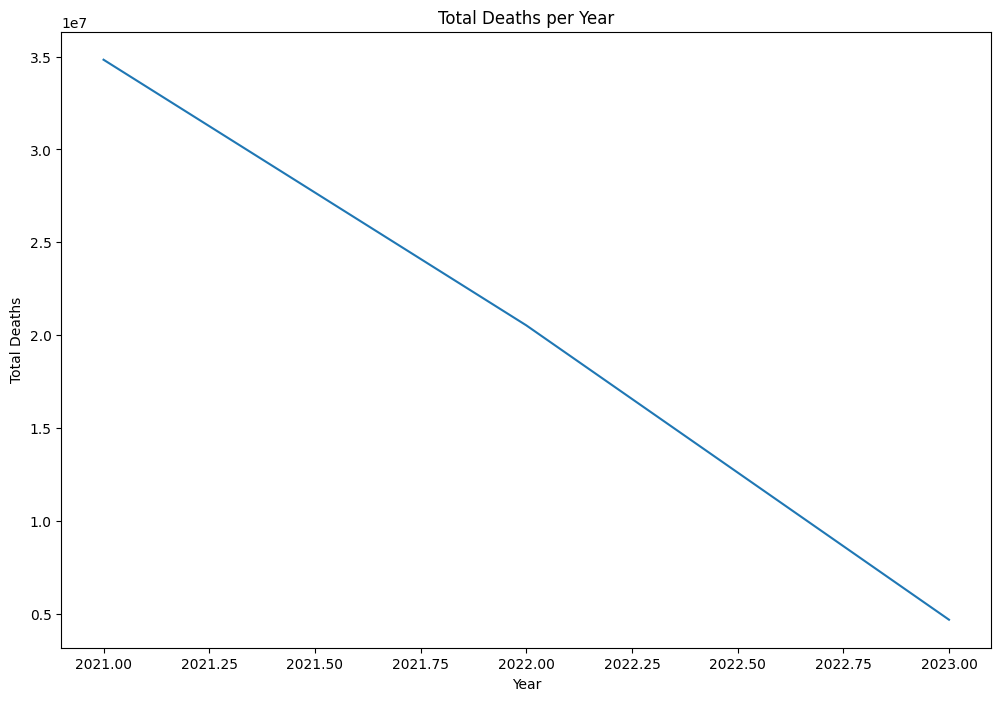

In [18]:
plt.figure(figsize=(12, 8))

df.groupby('Year')['Deaths1'].sum().plot(kind='line', title="Total Deaths per Year")
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.show()


#### Death Count by Sex

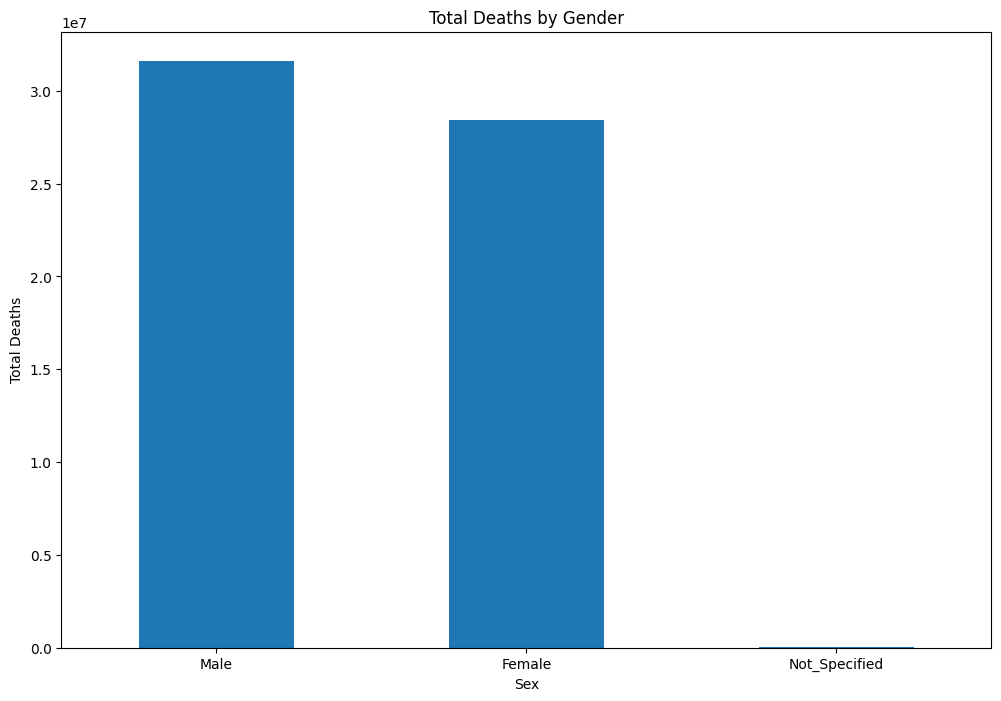

In [19]:
plt.figure(figsize=(12, 8))

df.groupby('Sex')['Deaths1'].sum().plot(kind='bar', title="Total Deaths by Gender")
plt.xticks(ticks=[0,1,2], labels=['Male', 'Female','Not_Specified'], rotation=0)
plt.ylabel("Total Deaths")
plt.show()


#### Checking the Number of Records per Country

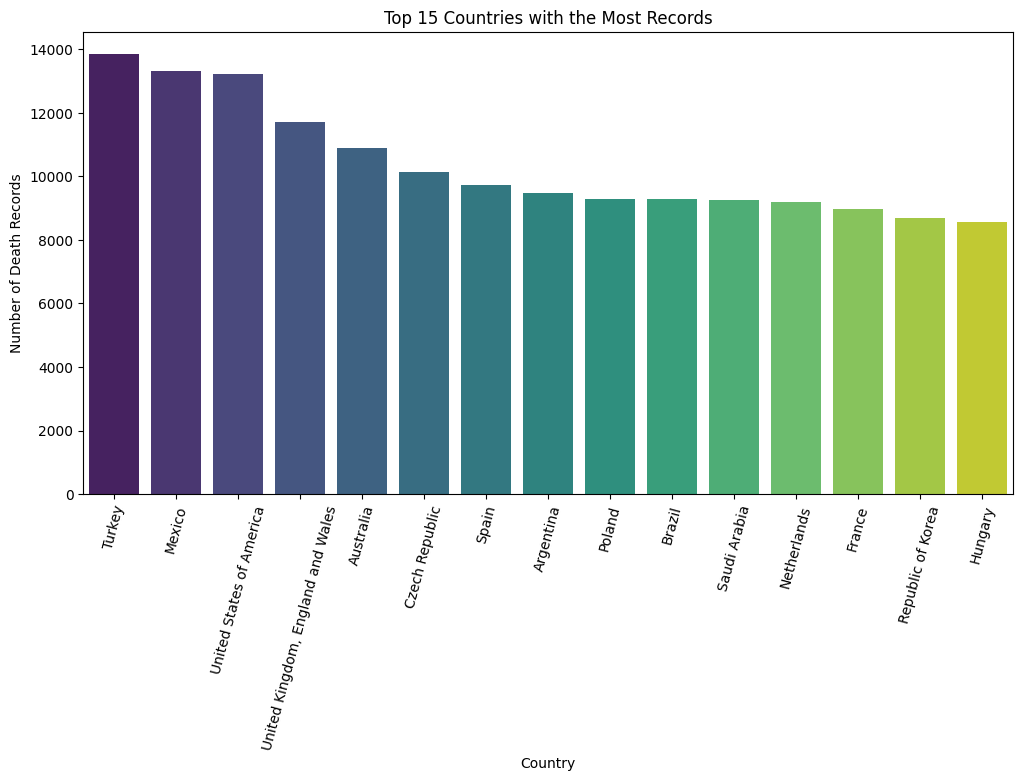

In [20]:
import seaborn as sns

plt.figure(figsize=(12, 6))
top_countries = df['Country_name'].value_counts().head(15)
sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Number of Death Records")
plt.title("Top 15 Countries with the Most Records")
plt.xticks(rotation=75)
plt.show()


#### Total Deaths by Year and Country

<Figure size 1200x600 with 0 Axes>

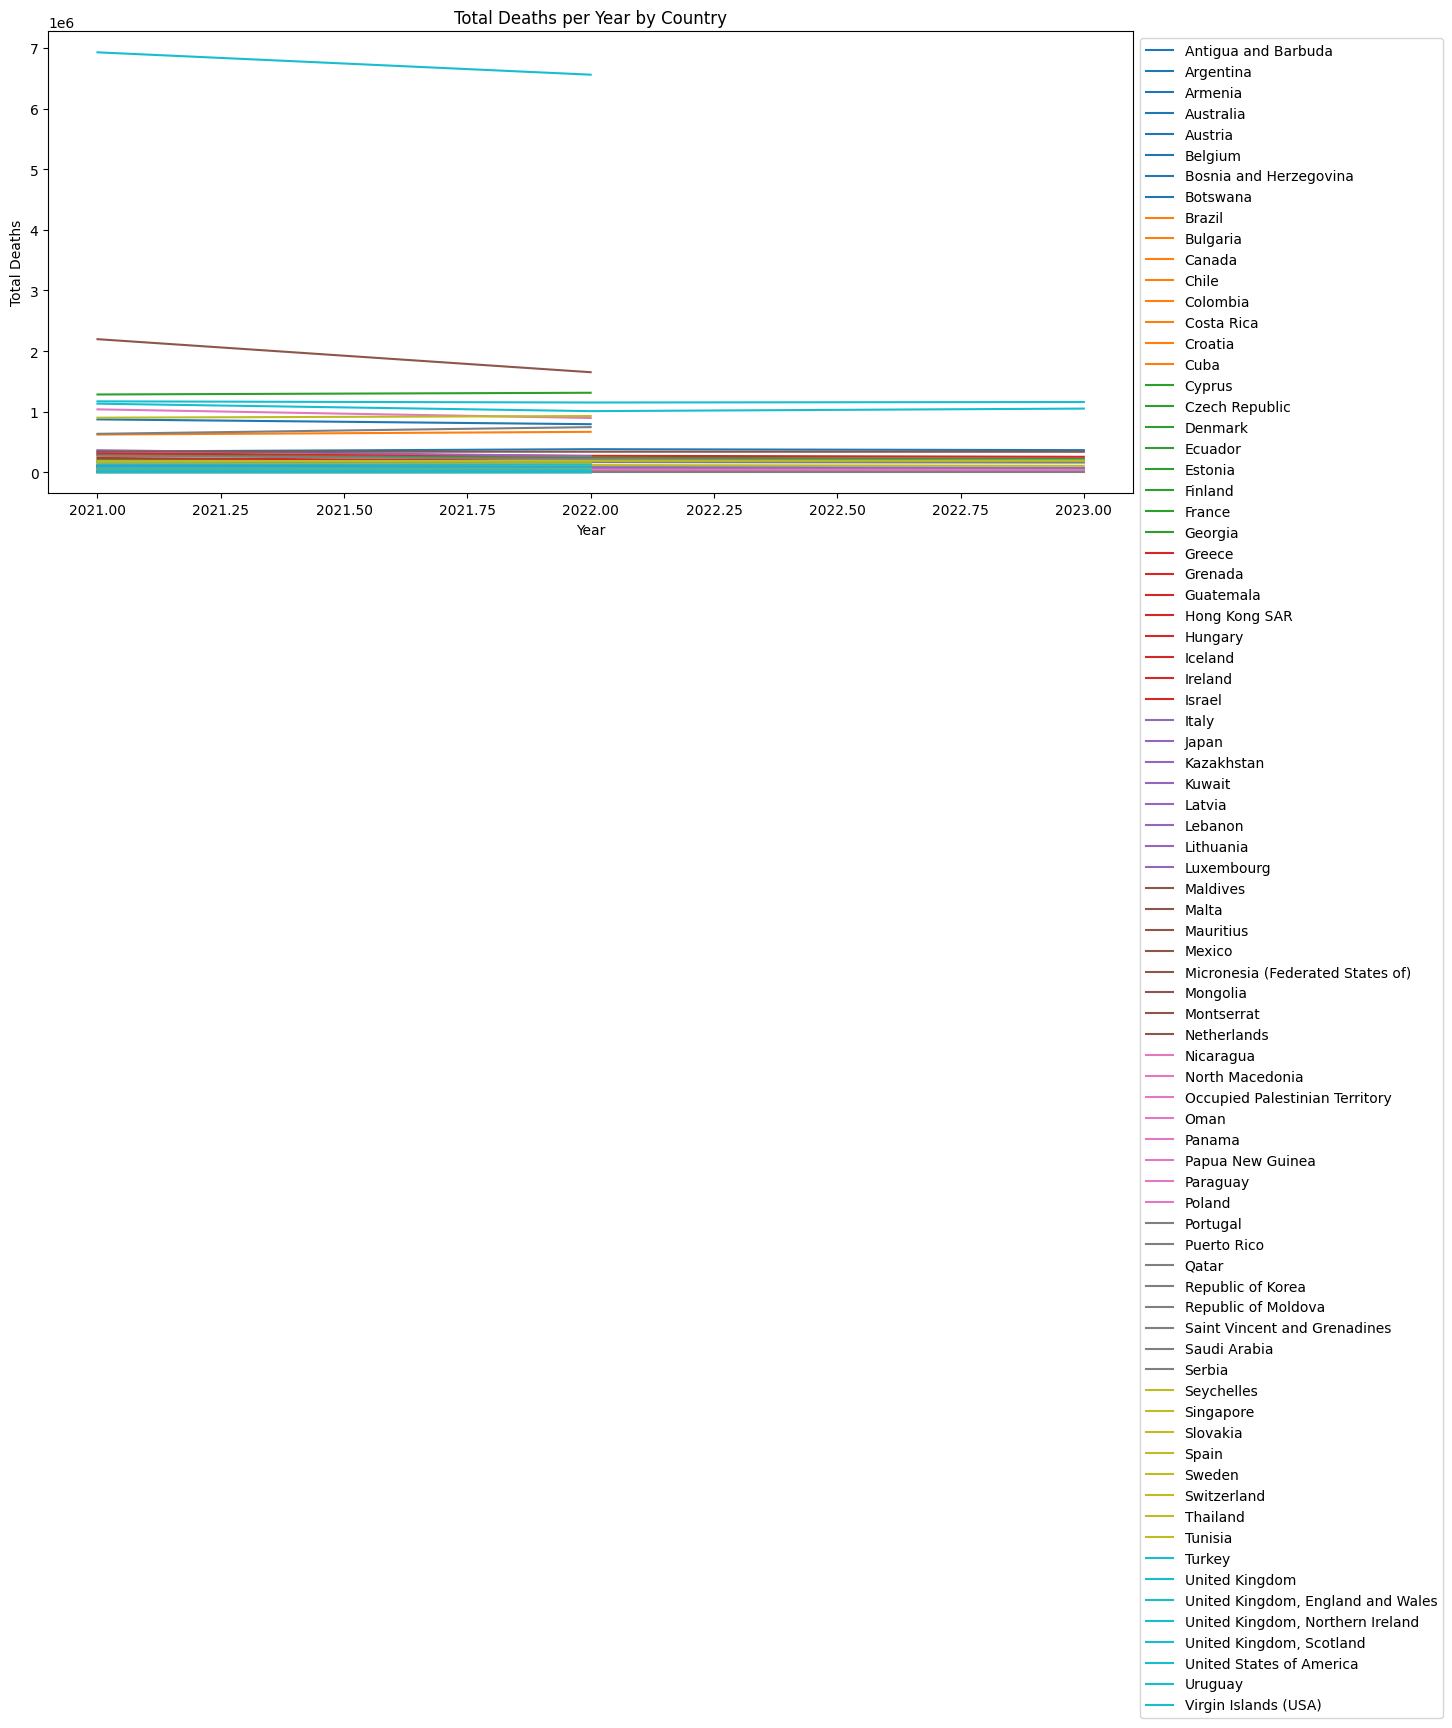

In [21]:
plt.figure(figsize=(12, 6))
country_death_trend = df.groupby(['Year', 'Country_name'])['Deaths1'].sum().unstack()
country_death_trend.plot(kind='line', colormap='tab10', figsize=(14, 6))
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.title("Total Deaths per Year by Country")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


#### Feature Engineering and Feature Selection

In [18]:
# Start with the original dataframe
df_features = df_copy.copy()

# Step 1: Create total deaths column if not already present
if 'Deaths1' in df_features.columns:
    df_features['Total_Deaths'] = df_features['Deaths1']
else:
    # Sum all death columns except infant mortality
    df_features['Total_Deaths'] = df_features[[col for col in df_features.columns if col.startswith('Deaths') and 'IM_Deaths' not in col]].sum(axis=1)
    
# Ensure no zero values for division
df_features['Total_Deaths'] = df_features['Total_Deaths'].replace(0, 1)

# Step 2: Calculate the proportion of deaths in each age group
death_prop_cols = []
for col in df_features.columns:
    if col.startswith('Deaths') and 'IM_Deaths' not in col and col != 'Deaths1' and col != 'Total_Deaths':
        new_col = f"{col}_Prop"
        df_features[new_col] = df_features[col] / df_features['Total_Deaths']
        death_prop_cols.append(new_col)

# Step 3: Create age group bins for more interpretable patterns
age_groups = {
    'Child_Deaths_Prop': [f'Deaths{i}_Prop' for i in range(2, 7) if f'Deaths{i}_Prop' in df_features.columns],
    'Youth_Deaths_Prop': [f'Deaths{i}_Prop' for i in range(7, 11) if f'Deaths{i}_Prop' in df_features.columns],
    'Young_Adult_Deaths_Prop': [f'Deaths{i}_Prop' for i in range(11, 15) if f'Deaths{i}_Prop' in df_features.columns],
    'Middle_Age_Deaths_Prop': [f'Deaths{i}_Prop' for i in range(15, 19) if f'Deaths{i}_Prop' in df_features.columns],
    'Senior_Deaths_Prop': [f'Deaths{i}_Prop' for i in range(19, 23) if f'Deaths{i}_Prop' in df_features.columns],
    'Elderly_Deaths_Prop': [f'Deaths{i}_Prop' for i in range(23, 26) if f'Deaths{i}_Prop' in df_features.columns],
}

age_group_cols = []
for group_name, cols in age_groups.items():
    if cols:  # If there are columns in this group
        df_features[group_name] = df_features[cols].sum(axis=1)
        age_group_cols.append(group_name)

# Step 4: Create country and cause specific aggregates
if 'Country' in df_features.columns:
    df_features['Mean_Deaths_Country'] = df_features.groupby('Country')['Total_Deaths'].transform('mean')
    df_features['Death_Rate_Deviation'] = df_features['Total_Deaths'] / df_features['Mean_Deaths_Country'].replace(0, 1)

if 'Cause' in df_features.columns:
    df_features['Mean_Deaths_Cause'] = df_features.groupby('Cause')['Total_Deaths'].transform('mean')
    df_features['Cause_Mortality_Index'] = df_features['Total_Deaths'] / df_features['Mean_Deaths_Cause'].replace(0, 1)

# Step 5: Create age-related ratios
if 'Child_Deaths_Prop' in df_features.columns and 'Elderly_Deaths_Prop' in df_features.columns:
    df_features['Child_to_Elderly_Ratio'] = df_features['Child_Deaths_Prop'] / (df_features['Elderly_Deaths_Prop'] + 0.001)

if 'Youth_Deaths_Prop' in df_features.columns and 'Senior_Deaths_Prop' in df_features.columns:
    df_features['Youth_to_Senior_Ratio'] = df_features['Youth_Deaths_Prop'] / (df_features['Senior_Deaths_Prop'] + 0.001)

# Step 6: Calculate infant mortality metrics if available
if all(col in df_features.columns for col in ['IM_Deaths1', 'IM_Deaths2', 'IM_Deaths3', 'IM_Deaths4']):
    # Total infant deaths across all age ranges
    df_features['Total_Infant_Deaths'] = df_features[['IM_Deaths1', 'IM_Deaths2', 'IM_Deaths3', 'IM_Deaths4']].sum(axis=1)
    # Infant mortality as a proportion of total deaths
    df_features['Infant_Death_Ratio'] = df_features['Total_Infant_Deaths'] / df_features['Total_Deaths']

# Step 7: Create year-based metrics if applicable
if 'Year' in df_features.columns:
    # Convert to numeric if not already
    df_features['Year'] = pd.to_numeric(df_features['Year'], errors='coerce')
    # Create era indicators (e.g., decades)
    df_features['Decade'] = (df_features['Year'] // 10) * 10

# Step 8: Feature interactions
# Combine cause and sex
if 'Cause' in df_features.columns and 'Sex' in df_features.columns:
    df_features['Cause_Sex'] = df_features['Cause'].astype(str) + "_" + df_features['Sex'].astype(str)

# Display the engineered features
print(f"Created {df_features.shape[1] - df_copy.shape[1]} new features")
print("New features added:")
display(list(set(df_features.columns) - set(df_copy.columns)))

# Check for any new missing values from the feature engineering
new_missing = df_features.isnull().sum()
if new_missing.max() > 0:
    print("\nNew missing values introduced during feature engineering:")
    display(new_missing[new_missing > 0])
    
    # Impute any new missing values
    df_features = df_features.fillna(df_features.mean())

Created 39 new features
New features added:


['Deaths19_Prop',
 'Deaths11_Prop',
 'Deaths26_Prop',
 'Youth_Deaths_Prop',
 'Deaths9_Prop',
 'Deaths3_Prop',
 'Senior_Deaths_Prop',
 'Death_Rate_Deviation',
 'Deaths10_Prop',
 'Deaths6_Prop',
 'Deaths8_Prop',
 'Child_to_Elderly_Ratio',
 'Deaths7_Prop',
 'Youth_to_Senior_Ratio',
 'Deaths2_Prop',
 'Decade',
 'Deaths14_Prop',
 'Total_Deaths',
 'Deaths5_Prop',
 'Deaths21_Prop',
 'Deaths16_Prop',
 'Deaths17_Prop',
 'Deaths13_Prop',
 'Middle_Age_Deaths_Prop',
 'Elderly_Deaths_Prop',
 'Deaths18_Prop',
 'Deaths15_Prop',
 'Deaths24_Prop',
 'Deaths20_Prop',
 'Total_Infant_Deaths',
 'Deaths4_Prop',
 'Deaths22_Prop',
 'Young_Adult_Deaths_Prop',
 'Mean_Deaths_Country',
 'Deaths25_Prop',
 'Child_Deaths_Prop',
 'Infant_Death_Ratio',
 'Deaths12_Prop',
 'Deaths23_Prop']

In [19]:
# Start by identifying different types of features
# Original features (excluding target and identifiers)
original_cols = df_copy.columns.tolist()
# Engineered features
engineered_cols = list(set(df_features.columns) - set(original_cols))

# Identify which columns we want to use for clustering
# Exclude metadata columns and include only features that represent patterns
metadata_cols = ['Country', 'Country_name', 'Year', 'Cause', 'Cause_Name', 'Sex', 'List', 'Frmat', 'IM_Frmat']
# For clustering, we'll use both the original numeric columns and engineered features
numeric_original = [col for col in original_cols if col.startswith('Deaths') and col not in metadata_cols]
all_features = numeric_original + engineered_cols
# Remove any remaining metadata columns
all_features = [col for col in all_features if col in df_features.columns and col not in metadata_cols]

print(f"Total features available for selection: {len(all_features)}")


Total features available for selection: 65


#### Correlation Matrix

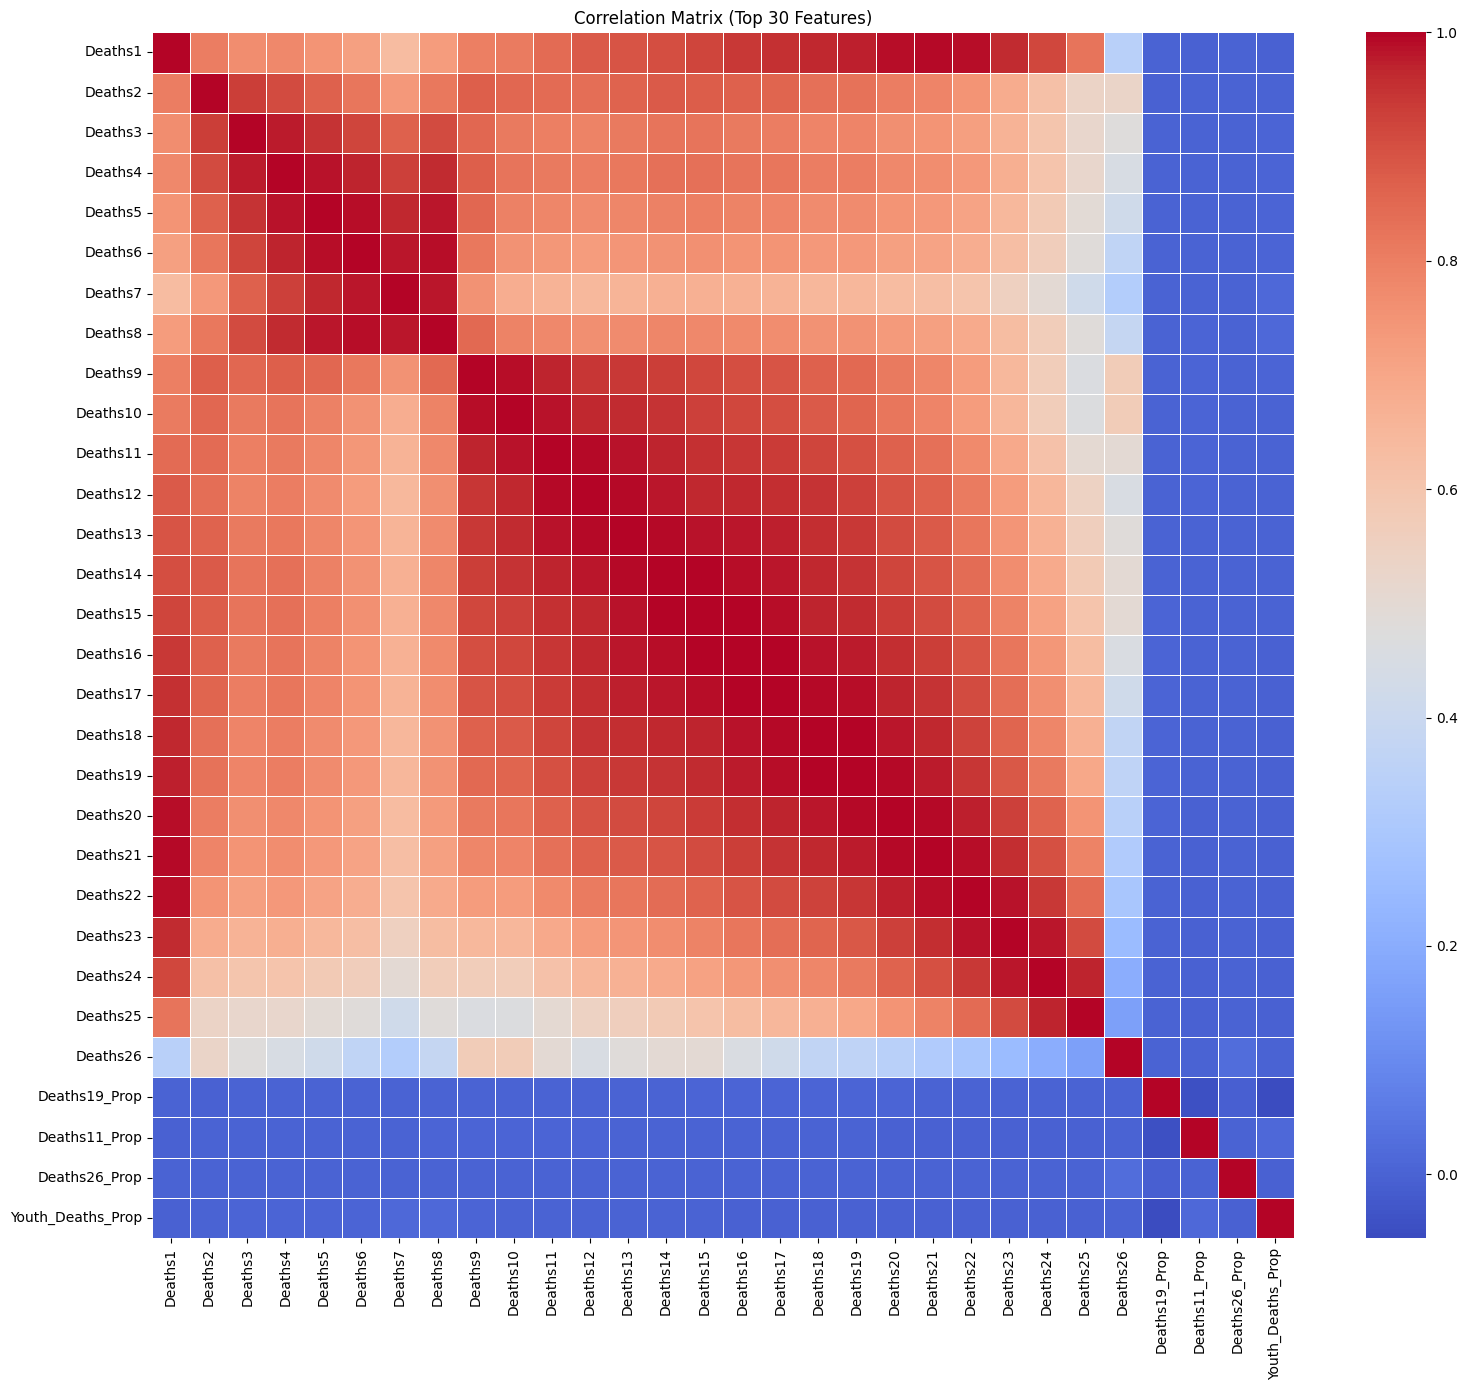

In [20]:
# Step 1: Correlation Analysis
# Calculate correlations between features
corr_matrix = df_features[all_features].corr()

# Visualize correlation matrix (truncated if too large)
plt.figure(figsize=(16, 14))
if len(all_features) > 30:
    # If too many features, show a subset
    top_features = all_features[:30]
    sns.heatmap(corr_matrix.loc[top_features, top_features], annot=False, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix (Top 30 Features)')
else:
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()

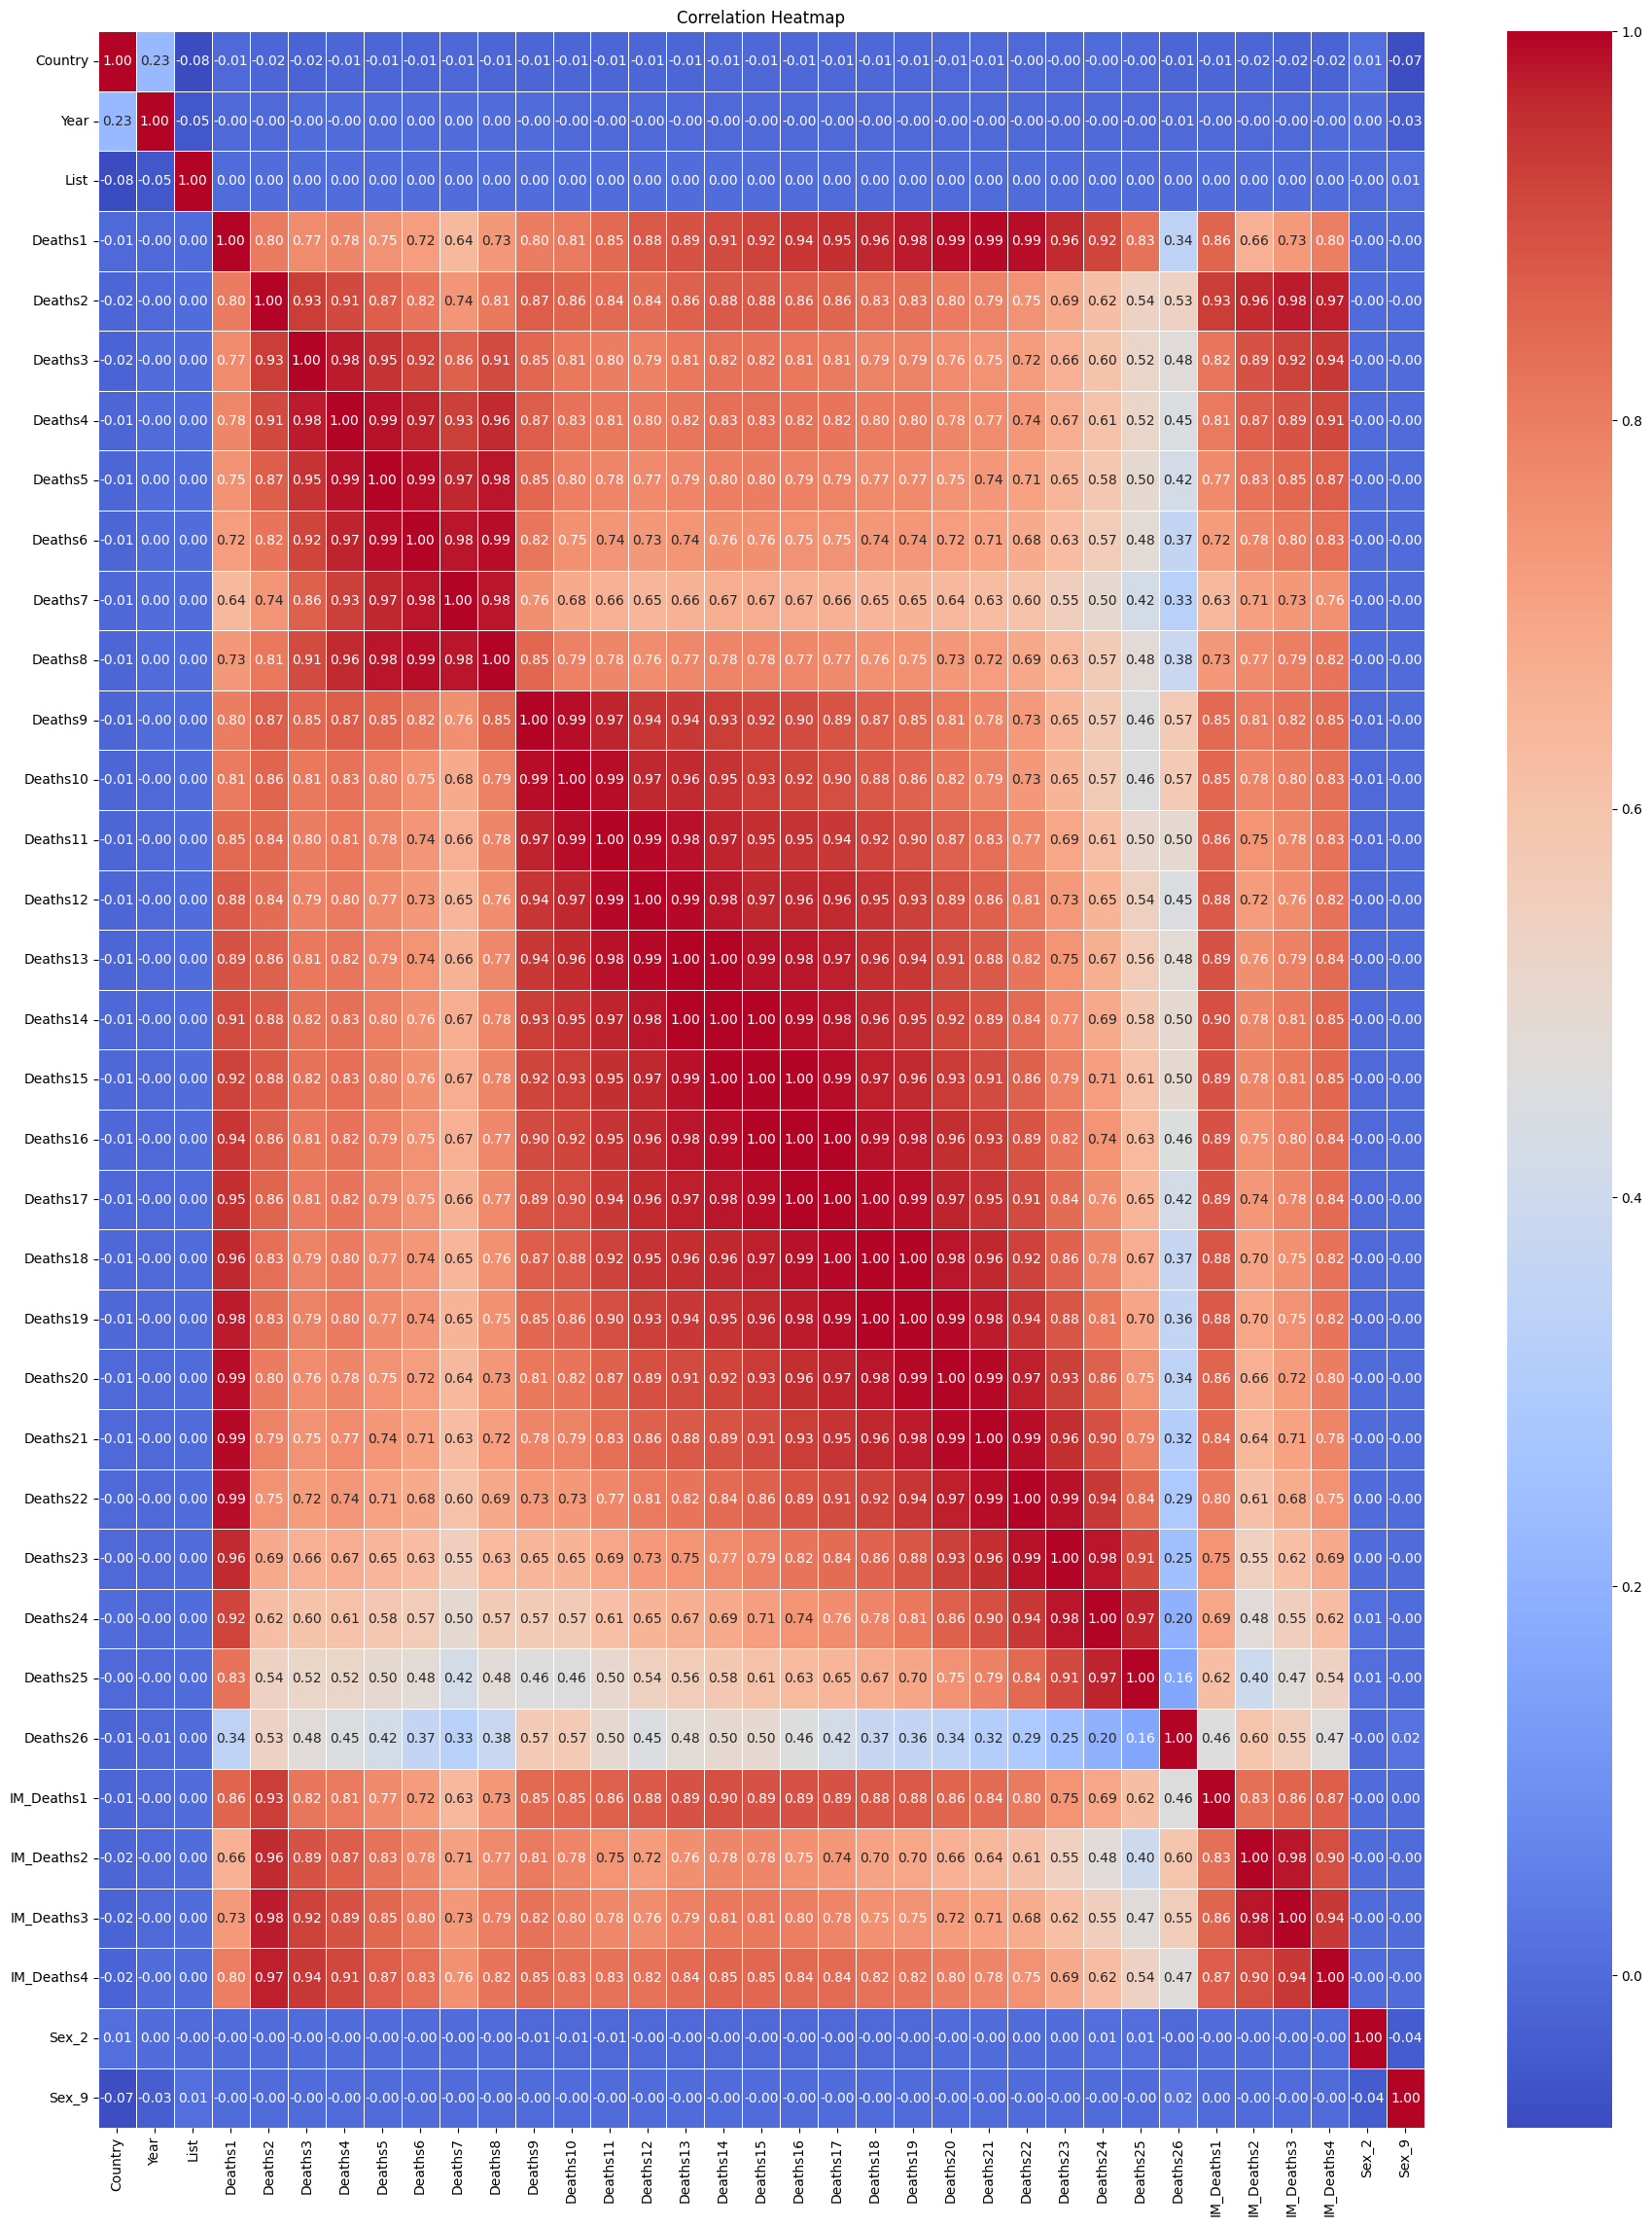

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for the dataframe
corr_matrix = df_copy.corr()

# Plot the heatmap
plt.figure(figsize=(22, 28))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


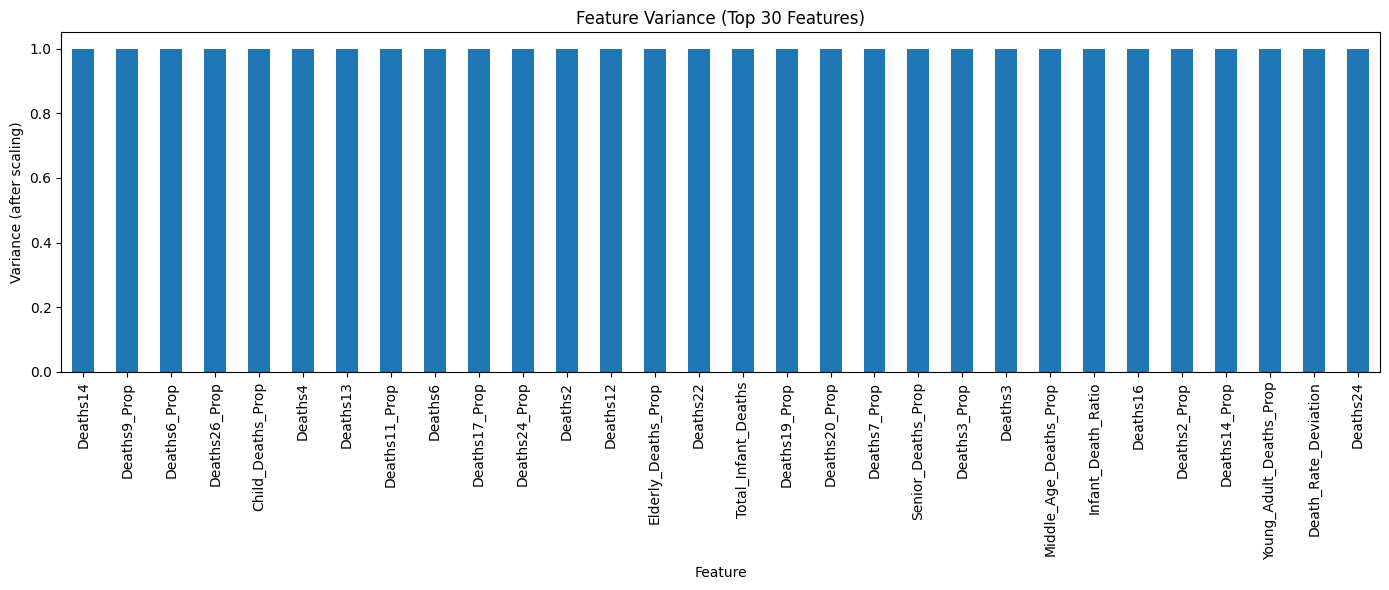

In [22]:
# Step 2: Variance Analysis
# Scale features before calculating variance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features[all_features])
scaled_df = pd.DataFrame(scaled_features, columns=all_features)

# Calculate and plot feature variances
variances = scaled_df.var().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
variances.head(30).plot(kind='bar')  # Show top 30 by variance
plt.title('Feature Variance (Top 30 Features)')
plt.xlabel('Feature')
plt.ylabel('Variance (after scaling)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('feature_variances.png')
plt.show()

In [ ]:
# Step 3: Feature Selection Methods
# Method 1: Variance Threshold
from sklearn.feature_selection import VarianceThreshold


variance_threshold = 0.001  
selector_var = VarianceThreshold(threshold=variance_threshold)
selector_var.fit(scaled_df)
selected_var = [all_features[i] for i in range(len(all_features)) if selector_var.get_support()[i]]
print(f"Features selected by variance threshold ({variance_threshold}): {len(selected_var)}")

Features selected by variance threshold (0.001): 64


In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# Method 2: Mutual Information (requires a target, we'll use Total_Deaths as a proxy)
if 'Total_Deaths' in df_features.columns:
    n_features_to_select = min(20, len(all_features))
    selector_mi = SelectKBest(mutual_info_regression, k=n_features_to_select)
    selector_mi.fit(df_features[all_features], df_features['Total_Deaths'])
    selected_mi = [all_features[i] for i in range(len(all_features)) if selector_mi.get_support()[i]]
    print(f"Features selected by mutual information: {len(selected_mi)}")
    
    # Plot mutual information scores
    mi_scores = selector_mi.scores_
    mi_df = pd.DataFrame({'Feature': all_features, 'MI Score': mi_scores})
    mi_df = mi_df.sort_values('MI Score', ascending=False)
    
    plt.figure(figsize=(14, 6))
    sns.barplot(x='Feature', y='MI Score', data=mi_df.head(20))
    plt.title('Top 20 Features by Mutual Information Score')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig('mutual_information_scores.png')
    plt.show()

In [28]:
# Method 3: Correlation-based Selection
# Find highly correlated feature pairs
threshold = 0.9
high_corr_pairs = []

for i in range(len(corr_matrix)):
    for j in range(i + 1, len(corr_matrix)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr_matrix.index[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

if high_corr_pairs:
    print(f"Found {len(high_corr_pairs)} highly correlated feature pairs (|r| > {threshold}):")
    high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
    display(high_corr_df.sort_values('Correlation', ascending=False).head(10))

# Choose features for final model
# Combine results from different methods
selected_features = list(set(selected_var))


# Limit maximum number of features for efficiency
max_features = 30
if len(selected_features) > max_features:
    # Prioritize features with highest variance
    top_variance_features = variances.index[:max_features].tolist()
    selected_features = [f for f in top_variance_features if f in selected_features]
    selected_features = selected_features[:max_features]

print(f"\nFinal selected features ({len(selected_features)}):")
print(selected_features)

# Prepare dataframe with selected features for clustering
X = df_features[selected_features].copy()
print(f"Feature selection complete. Selected {X.shape[1]} features from {len(all_features)} candidates.")

Found 112 highly correlated feature pairs (|r| > 0.9):


,Feature 1,Feature 2,Correlation
82,Deaths16,Deaths17,0.997007
92,Deaths18,Deaths19,0.996859
76,Deaths15,Deaths16,0.996455
70,Deaths14,Deaths15,0.996377
63,Deaths13,Deaths14,0.995875
87,Deaths17,Deaths18,0.995345
56,Deaths12,Deaths13,0.994025
7,Deaths1,Deaths21,0.993888
99,Deaths20,Deaths21,0.993769
48,Deaths11,Deaths12,0.993394



Final selected features (30):
['Deaths14', 'Deaths9_Prop', 'Deaths6_Prop', 'Deaths26_Prop', 'Child_Deaths_Prop', 'Deaths4', 'Deaths13', 'Deaths11_Prop', 'Deaths6', 'Deaths17_Prop', 'Deaths24_Prop', 'Deaths2', 'Deaths12', 'Elderly_Deaths_Prop', 'Deaths22', 'Total_Infant_Deaths', 'Deaths19_Prop', 'Deaths20_Prop', 'Deaths7_Prop', 'Senior_Deaths_Prop', 'Deaths3_Prop', 'Deaths3', 'Middle_Age_Deaths_Prop', 'Infant_Death_Ratio', 'Deaths16', 'Deaths2_Prop', 'Deaths14_Prop', 'Young_Adult_Deaths_Prop', 'Death_Rate_Deviation', 'Deaths24']
Feature selection complete. Selected 30 features from 65 candidates.


### Dimensionality Reduction

Applying PCA...
  Explained variance ratio: [0.32385827 0.07924466 0.06792624]
  Total explained variance: 0.47


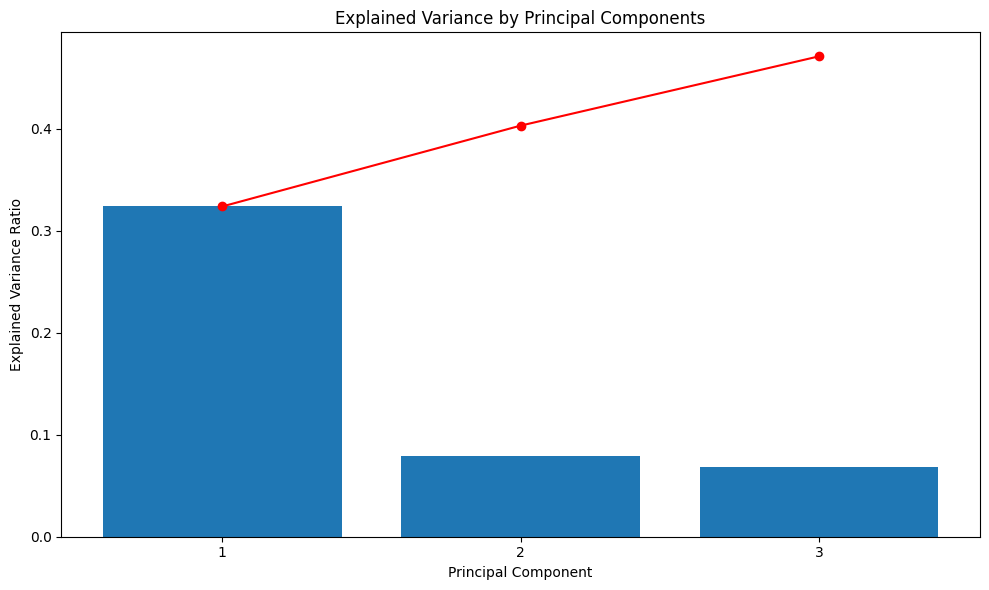

  Completed in 0.36 seconds


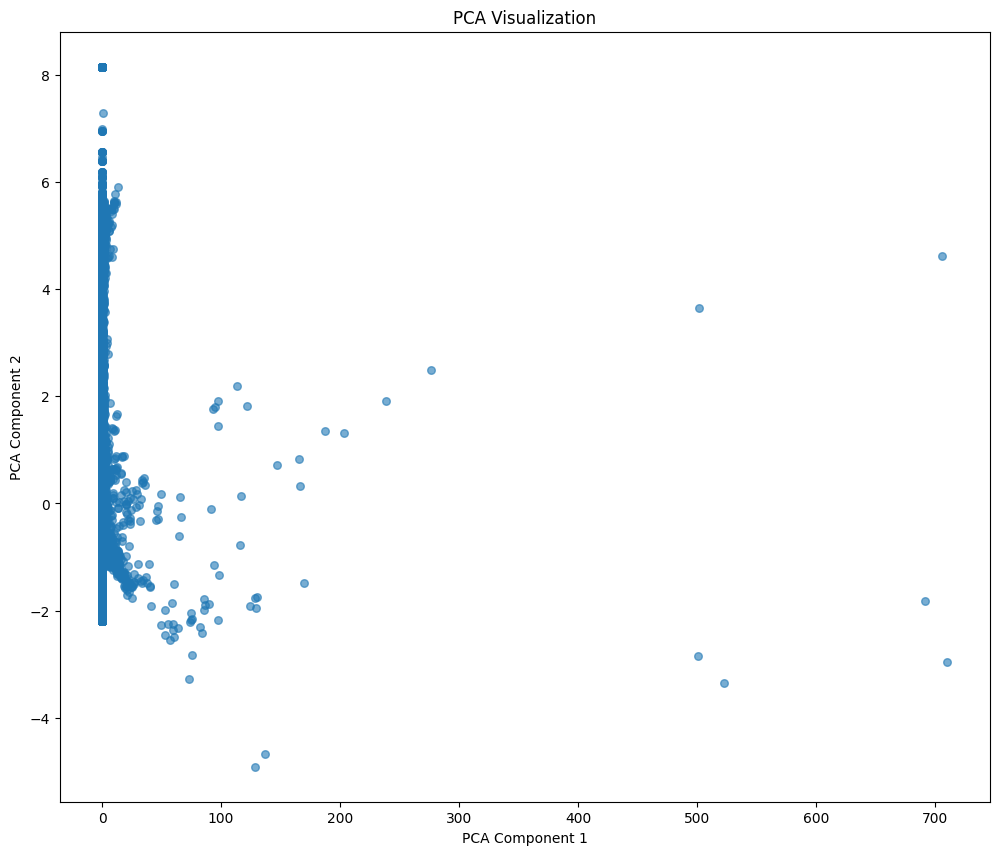

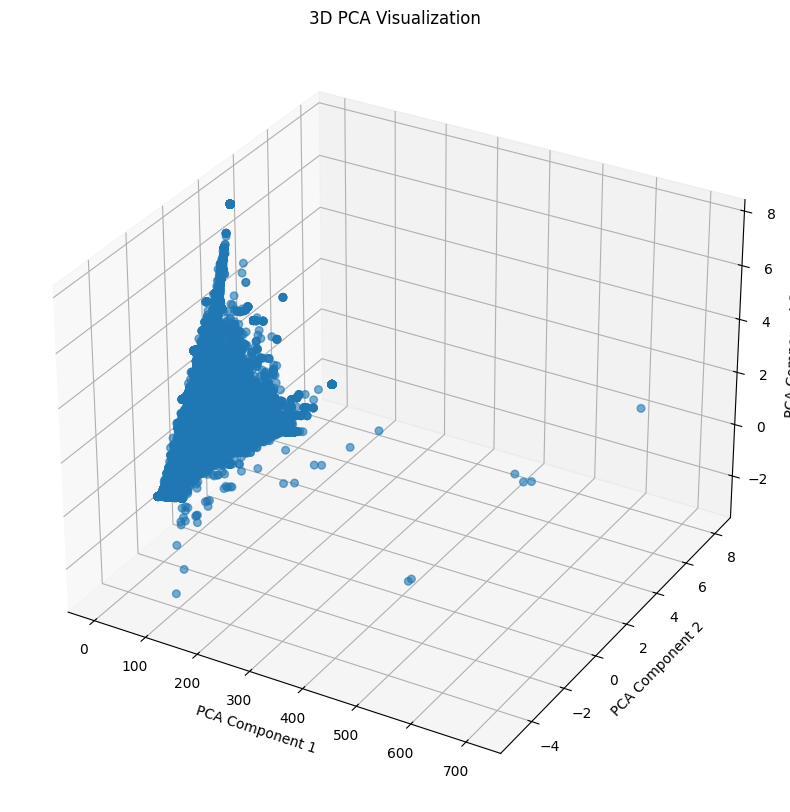

Applying TSNE...
  Dataset is large, using 5000 samples for TSNE...
  Completed in 52.60 seconds


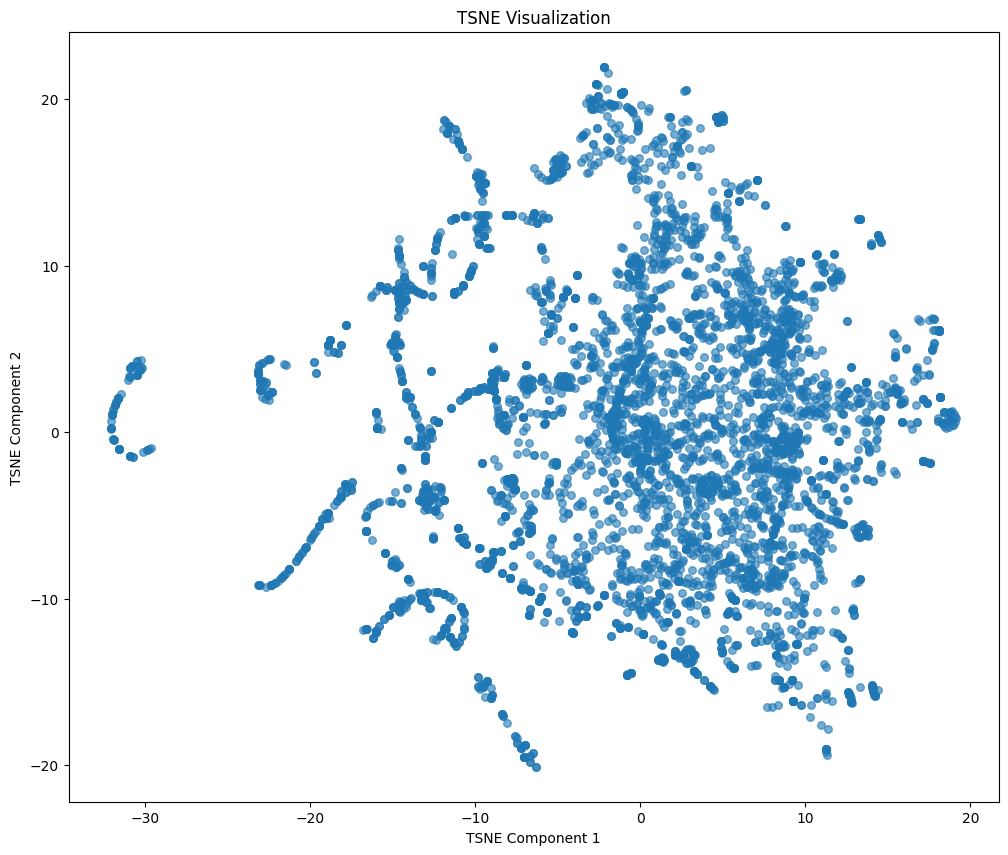

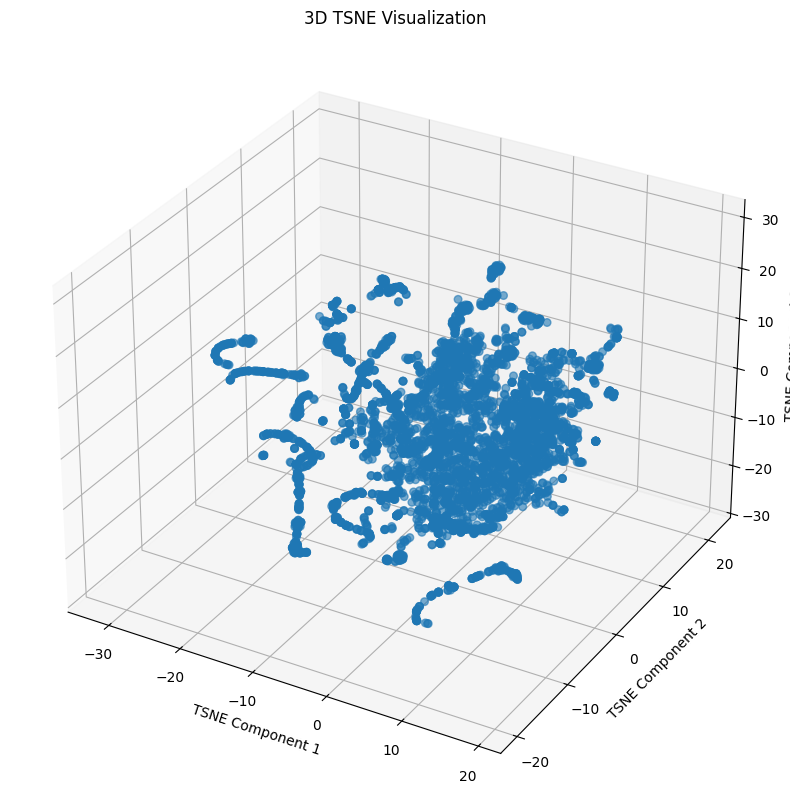

In [29]:
# Standardize the data before dimensionality reduction
import time

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Try different dimensionality reduction techniques and compare
reduction_methods = {
    'PCA': PCA(n_components=3, random_state=42),
    'TSNE': TSNE(n_components=3, perplexity=min(30, len(X)-1), random_state=42)
}

reduced_data = {}
for method_name, reducer in reduction_methods.items():
    print(f"Applying {method_name}...")
    start_time = time.time()
    
    if method_name == 'PCA':
        result = reducer.fit_transform(X_scaled)
        # Calculate explained variance
        explained_variance = reducer.explained_variance_ratio_
        print(f"  Explained variance ratio: {explained_variance}")
        print(f"  Total explained variance: {sum(explained_variance):.2f}")
        
        # Plot explained variance
        plt.figure(figsize=(10, 6))
        plt.bar(range(1, len(explained_variance) + 1), explained_variance)
        plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), 'r-o')
        plt.xlabel('Principal Component')
        plt.ylabel('Explained Variance Ratio')
        plt.title('Explained Variance by Principal Components')
        plt.xticks(range(1, len(explained_variance) + 1))
        plt.tight_layout()
        plt.savefig('pca_explained_variance.png')
        plt.show()
    else:
        # For t-SNE, use only a sample if dataset is large
        if len(X) > 5000:
            print(f"  Dataset is large, using 5000 samples for {method_name}...")
            sample_indices = np.random.choice(len(X), 5000, replace=False)
            result = reducer.fit_transform(X_scaled[sample_indices])
            # Create full result array with NaNs
            full_result = np.full((len(X), result.shape[1]), np.nan)
            full_result[sample_indices] = result
            result = full_result
        else:
            result = reducer.fit_transform(X_scaled)
    
    end_time = time.time()
    print(f"  Completed in {end_time - start_time:.2f} seconds")
    
    # Store results
    reduced_data[method_name] = result
    # Create dataframe for this reduction
    cols = [f'{method_name}{i+1}' for i in range(result.shape[1])]
    reduced_df = pd.DataFrame(result, columns=cols)
    
    # Visualize the first 2 components
    plt.figure(figsize=(12, 10))
    if method_name == 'TSNE' and len(X) > 5000:
        # For t-SNE with sampled data, only plot non-NaN points
        valid_indices = ~np.isnan(result[:, 0])
        plt.scatter(result[valid_indices, 0], result[valid_indices, 1], s=30, alpha=0.6)
    else:
        plt.scatter(result[:, 0], result[:, 1], s=30, alpha=0.6)
    plt.title(f'{method_name} Visualization')
    plt.xlabel(f'{method_name} Component 1')
    plt.ylabel(f'{method_name} Component 2')
    plt.savefig(f'{method_name.lower()}_visualization.png')
    plt.show()
    
    # 3D visualization if we have 3+ dimensions
    if result.shape[1] >= 3:
        try:
            from mpl_toolkits.mplot3d import Axes3D
            
            fig = plt.figure(figsize=(12, 10))
            ax = fig.add_subplot(111, projection='3d')
            
            if method_name == 'TSNE' and len(X) > 5000:
                # For t-SNE with sampled data, only plot non-NaN points
                valid_indices = ~np.isnan(result[:, 0])
                ax.scatter(
                    result[valid_indices, 0],
                    result[valid_indices, 1],
                    result[valid_indices, 2],
                    s=30,
                    alpha=0.6
                )
            else:
                ax.scatter(
                    result[:, 0],
                    result[:, 1],
                    result[:, 2],
                    s=30,
                    alpha=0.6
                )
            
            ax.set_title(f'3D {method_name} Visualization')
            ax.set_xlabel(f'{method_name} Component 1')
            ax.set_ylabel(f'{method_name} Component 2')
            ax.set_zlabel(f'{method_name} Component 3')
            plt.savefig(f'{method_name.lower()}_3d_visualization.png')
            plt.show()
        except Exception as e:
            print(f"Could not create 3D visualization for {method_name}: {e}")

# Choose the best dimensionality reduction for clustering visualization
# For now, let's use PCA as it's more deterministic and preserves distances better
# We'll use this for visualizing the clusters later
best_reduction = 'PCA'
X_reduced = reduced_data[best_reduction]

## Modeling

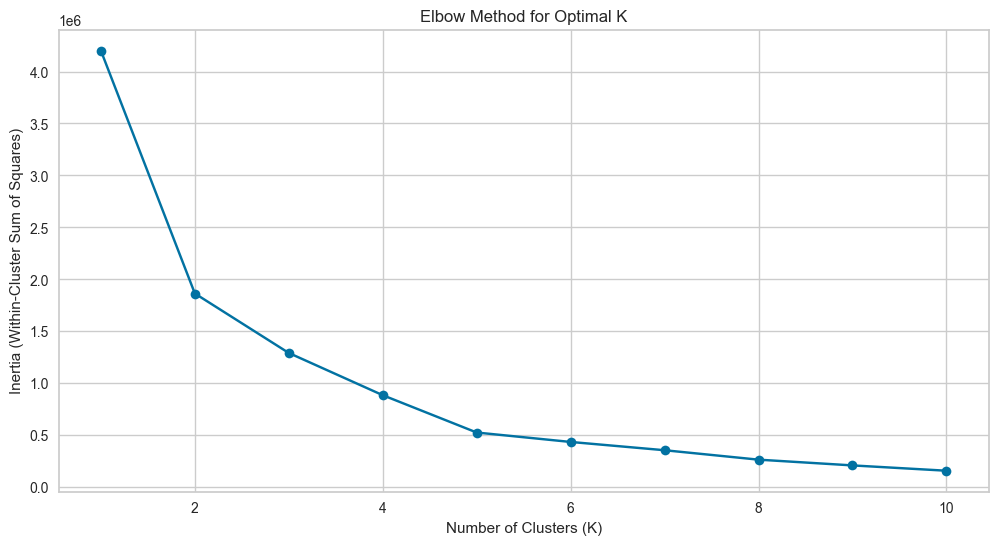

Elbow point detected at k = 2
Optimal number of clusters based on Elbow Method: 2

Final selected number of clusters: 2


In [140]:
# Find Optimal Number of Clusters
# Use the reduced data from previous cell (X_reduced)

# Elbow Method
inertia = []
K_range = range(1, 11)  # Testing K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_reduced)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(12, 6))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.savefig('elbow_method.png')
plt.show()


# Determine optimal k value based on both methods
# Find the "elbow" in the inertia plot (using a simple heuristic)
inertia_diff = np.diff(inertia)
elbow_point = np.where(np.diff(inertia_diff) > 0)[0][0] + 1 if len(np.where(np.diff(inertia_diff) > 0)[0]) > 0 else 4
print(f"Elbow point detected at k = {elbow_point + 1}")

optimal_k = elbow_point + 1  # Adjusting for zero-based index
print(f"Optimal number of clusters based on Elbow Method: {optimal_k}")

print(f"\nFinal selected number of clusters: {optimal_k}")

In [30]:
optimal_k = 4

In [31]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Create a DataFrame to store evaluation results
results_df = pd.DataFrame(columns=['Algorithm', 'n_clusters', 'Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz', 'Time(s)'])

# Function to evaluate clustering results
def evaluate_clustering(labels, X, algorithm_name, n_clusters, time_taken):
    unique_labels = np.unique(labels)
    has_noise = -1 in unique_labels

    if len(unique_labels) > 1 and not has_noise:
        if len(X) > 10000:
            sample_indices = np.random.choice(len(X), 10000, replace=False)
            silhouette = silhouette_score(X[sample_indices], labels[sample_indices])
            db_score = davies_bouldin_score(X[sample_indices], labels[sample_indices])
            ch_score = calinski_harabasz_score(X[sample_indices], labels[sample_indices])
        else:
            silhouette = silhouette_score(X, labels)
            db_score = davies_bouldin_score(X, labels)
            ch_score = calinski_harabasz_score(X, labels)
    else:
        silhouette = db_score = ch_score = float('nan')

    results_df.loc[len(results_df)] = [algorithm_name, n_clusters, silhouette, db_score, ch_score, time_taken]

    print(f"{algorithm_name} with {n_clusters} clusters:")
    print(f"  Silhouette Score: {silhouette:.4f}")
    print(f"  Davies-Bouldin Index: {db_score:.4f}")
    print(f"  Calinski-Harabasz Index: {ch_score:.2f}")
    print(f"  Time: {time_taken:.2f} seconds")
    
    return labels

# Function to visualize clustering results
def visualize_clusters(X, labels, algorithm_name, model=None):
    unique_clusters = np.unique(labels)
    has_outliers = -1 in unique_clusters

    if has_outliers:
        n_clusters_without_noise = len(unique_clusters) - 1
        colors = plt.cm.viridis(np.linspace(0, 1, n_clusters_without_noise))
        colors = np.vstack([[0.7, 0.7, 0.7, 1], colors])  # Grey for noise
        palette = {cluster: colors[i] for i, cluster in enumerate(unique_clusters)}
    else:
        palette = 'viridis'

    plt.figure(figsize=(14, 10))

    # Generate appropriate column names based on number of components
    if isinstance(X, np.ndarray):
        component_names = [f'Component{i+1}' for i in range(X.shape[1])]
        viz_df = pd.DataFrame(X, columns=component_names)
    else:
        viz_df = X.copy()
        viz_df.columns = [f'Component{i+1}' for i in range(X.shape[1])]

    viz_df['Cluster'] = labels

    # Only plot first two components
    scatter = sns.scatterplot(
        x='Component1',
        y='Component2',
        hue='Cluster',
        palette=palette,
        data=viz_df,
        s=50,
        alpha=0.7
    )

    if model is not None and hasattr(model, 'cluster_centers_'):
        centers = model.cluster_centers_
        plt.scatter(
            centers[:, 0],
            centers[:, 1],
            c='black',
            s=200,
            alpha=0.8,
            marker='X',
            label='Cluster Centers'
        )

    cluster_sizes = pd.Series(labels).value_counts().sort_index()
    for cluster, size in cluster_sizes.items():
        label = f"Noise: {size} points" if cluster == -1 else f"Cluster {cluster}: {size} points"
        centroid_x = viz_df[viz_df['Cluster'] == cluster]['Component1'].mean()
        centroid_y = viz_df[viz_df['Cluster'] == cluster]['Component2'].mean()

        plt.annotate(
            label,
            (centroid_x, centroid_y),
            fontsize=10,
            fontweight='bold',
            alpha=0.8,
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
        )

    handles, labels_ = scatter.get_legend_handles_labels()
    plt.legend(handles, labels_, title="Clusters", loc="best")

    plt.title(f'Mortality Data Clusters ({algorithm_name})')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.tight_layout()
    plt.savefig(f'mortality_clusters_{algorithm_name}.png', dpi=300)
    plt.show()

    print("\nCluster distribution:")
    for cluster, count in cluster_sizes.items():
        cluster_label = "Noise/Outliers" if cluster == -1 else f"Cluster {cluster}"
        pct = count / len(labels) * 100
        print(f"{cluster_label}: {count} records ({pct:.2f}%)")

    return viz_df

### K-Means


--- K-Means Clustering ---
K-Means with 4 clusters:
  Silhouette Score: 0.7100
  Davies-Bouldin Index: 0.2740
  Calinski-Harabasz Index: 36015.21
  Time: 0.63 seconds


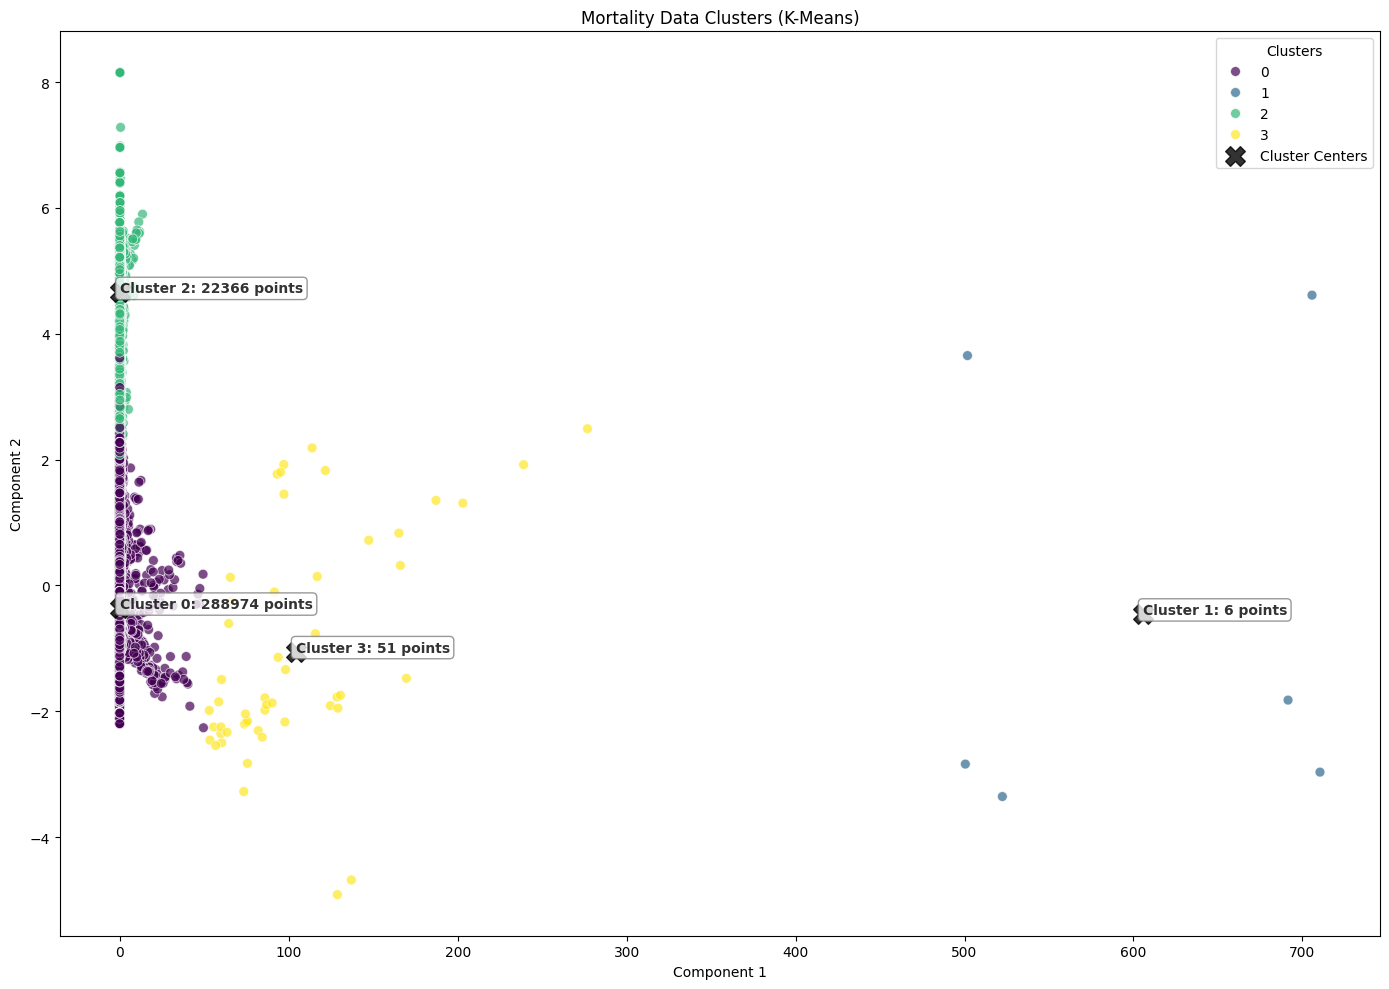


Cluster distribution:
Cluster 0: 288974 records (92.80%)
Cluster 1: 6 records (0.00%)
Cluster 2: 22366 records (7.18%)
Cluster 3: 51 records (0.02%)


,Component1,Component2,Component3,Cluster
0,0.092367,-0.518967,-0.273718,0
1,0.118886,-0.462233,-0.293315,0
2,-0.063958,0.015071,-0.483455,0
3,-0.065344,0.883988,-0.184145,0
4,-0.045583,0.341523,0.110278,0
...,...,...,...,...
311392,-0.060868,-0.416066,0.040149,0
311393,-0.074184,-0.822928,-0.457373,0
311394,0.061738,0.813824,-1.036619,0
311395,-0.064155,-0.873379,-1.802825,0


In [32]:
# K-Means Clustering
print("\n--- K-Means Clustering ---")
from sklearn.cluster import KMeans

start_time = time.time()
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_reduced)
kmeans_time = time.time() - start_time

# Evaluate K-Means
kmeans_labels = evaluate_clustering(kmeans_labels, X_reduced, "K-Means", optimal_k, kmeans_time)

# Visualize K-Means clusters
visualize_clusters(X_reduced, kmeans_labels, "K-Means", kmeans)

### K-Means after applying PCA

### Mini-Batch K-means 


--- Mini-Batch K-Means Clustering ---
Mini-Batch K-Means with 4 clusters:
  Silhouette Score: 0.3589
  Davies-Bouldin Index: 0.8154
  Calinski-Harabasz Index: 446.27
  Time: 0.04 seconds


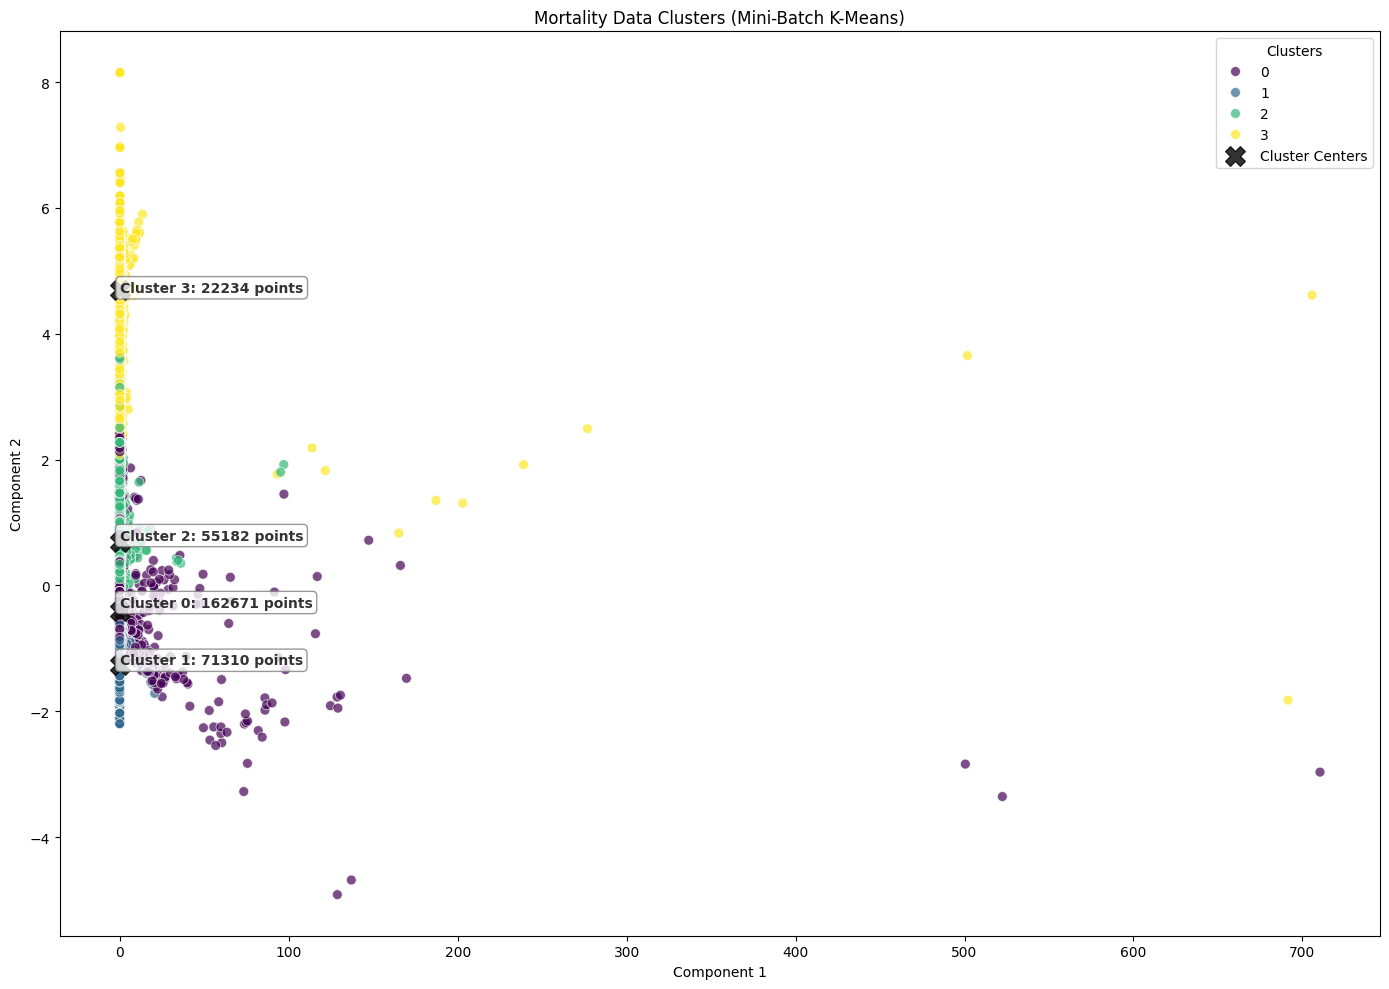


Cluster distribution:
Cluster 0: 162671 records (52.24%)
Cluster 1: 71310 records (22.90%)
Cluster 2: 55182 records (17.72%)
Cluster 3: 22234 records (7.14%)


,Component1,Component2,Component3,Cluster
0,0.092367,-0.518967,-0.273718,0
1,0.118886,-0.462233,-0.293315,0
2,-0.063958,0.015071,-0.483455,0
3,-0.065344,0.883988,-0.184145,0
4,-0.045583,0.341523,0.110278,0
...,...,...,...,...
311392,-0.060868,-0.416066,0.040149,0
311393,-0.074184,-0.822928,-0.457373,0
311394,0.061738,0.813824,-1.036619,0
311395,-0.064155,-0.873379,-1.802825,1


In [33]:
# Mini-Batch K-Means Clustering
print("\n--- Mini-Batch K-Means Clustering ---")
from sklearn.cluster import MiniBatchKMeans

start_time = time.time()
mbkmeans = MiniBatchKMeans(n_clusters=optimal_k, batch_size=1000, random_state=42)
mbkmeans_labels = mbkmeans.fit_predict(X_reduced)
mbkmeans_time = time.time() - start_time

# Evaluate Mini-Batch K-Means
mbkmeans_labels = evaluate_clustering(mbkmeans_labels, X_reduced, "Mini-Batch K-Means", optimal_k, mbkmeans_time)

# Visualize Mini-Batch K-Means clusters
visualize_clusters(X_reduced, mbkmeans_labels, "Mini-Batch K-Means", mbkmeans)

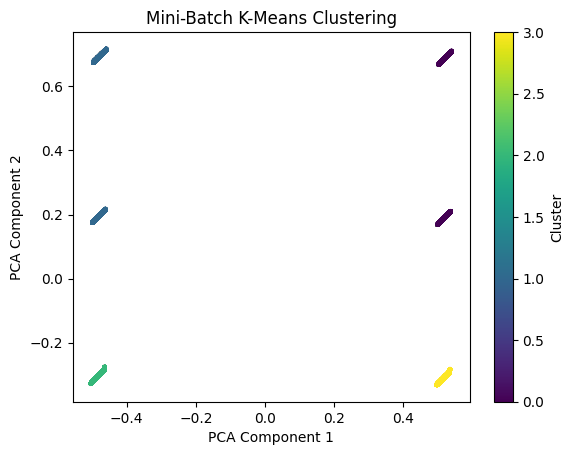

In [29]:
from sklearn.cluster import MiniBatchKMeans

# Mini-Batch K-Means
minibatch_kmeans = MiniBatchKMeans(n_clusters=optimal_k, random_state=42, batch_size=100)
df_copy['Cluster_MiniBatchKMeans'] = minibatch_kmeans.fit_predict(X)

# Visualization
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_copy['Cluster_MiniBatchKMeans'], cmap='viridis', s=5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Mini-Batch K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()


### Birch Clustering


--- Birch Clustering ---
Birch with 4 clusters:
  Silhouette Score: 0.9605
  Davies-Bouldin Index: 0.4370
  Calinski-Harabasz Index: 3525.42
  Time: 11.47 seconds


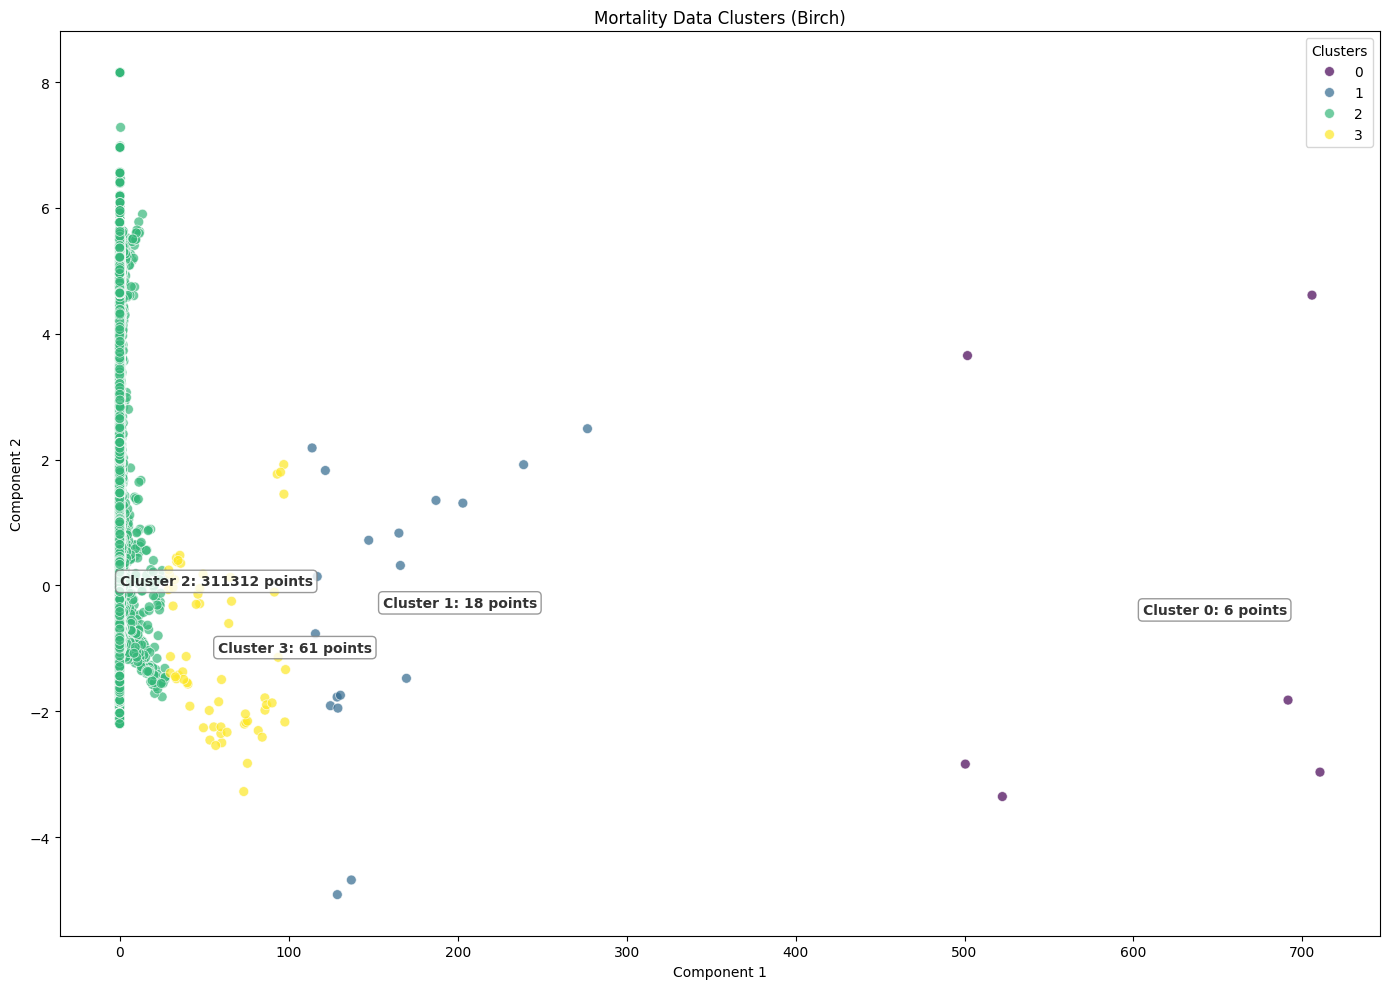


Cluster distribution:
Cluster 0: 6 records (0.00%)
Cluster 1: 18 records (0.01%)
Cluster 2: 311312 records (99.97%)
Cluster 3: 61 records (0.02%)


,Component1,Component2,Component3,Cluster
0,0.092367,-0.518967,-0.273718,2
1,0.118886,-0.462233,-0.293315,2
2,-0.063958,0.015071,-0.483455,2
3,-0.065344,0.883988,-0.184145,2
4,-0.045583,0.341523,0.110278,2
...,...,...,...,...
311392,-0.060868,-0.416066,0.040149,2
311393,-0.074184,-0.822928,-0.457373,2
311394,0.061738,0.813824,-1.036619,2
311395,-0.064155,-0.873379,-1.802825,2


In [34]:
# Birch Clustering
print("\n--- Birch Clustering ---")
from sklearn.cluster import Birch

start_time = time.time()
birch = Birch(n_clusters=optimal_k)
birch_labels = birch.fit_predict(X_reduced)
birch_time = time.time() - start_time

# Evaluate Birch
birch_labels = evaluate_clustering(birch_labels, X_reduced, "Birch", optimal_k, birch_time)

# Visualize Birch clusters
visualize_clusters(X_reduced, birch_labels, "Birch", birch)

### Gaussian Mixture Model (GMM) Clustering


--- Gaussian Mixture Model Clustering ---
Gaussian Mixture with 4 clusters:
  Silhouette Score: 0.0735
  Davies-Bouldin Index: 3.0041
  Calinski-Harabasz Index: 1772.88
  Time: 6.84 seconds


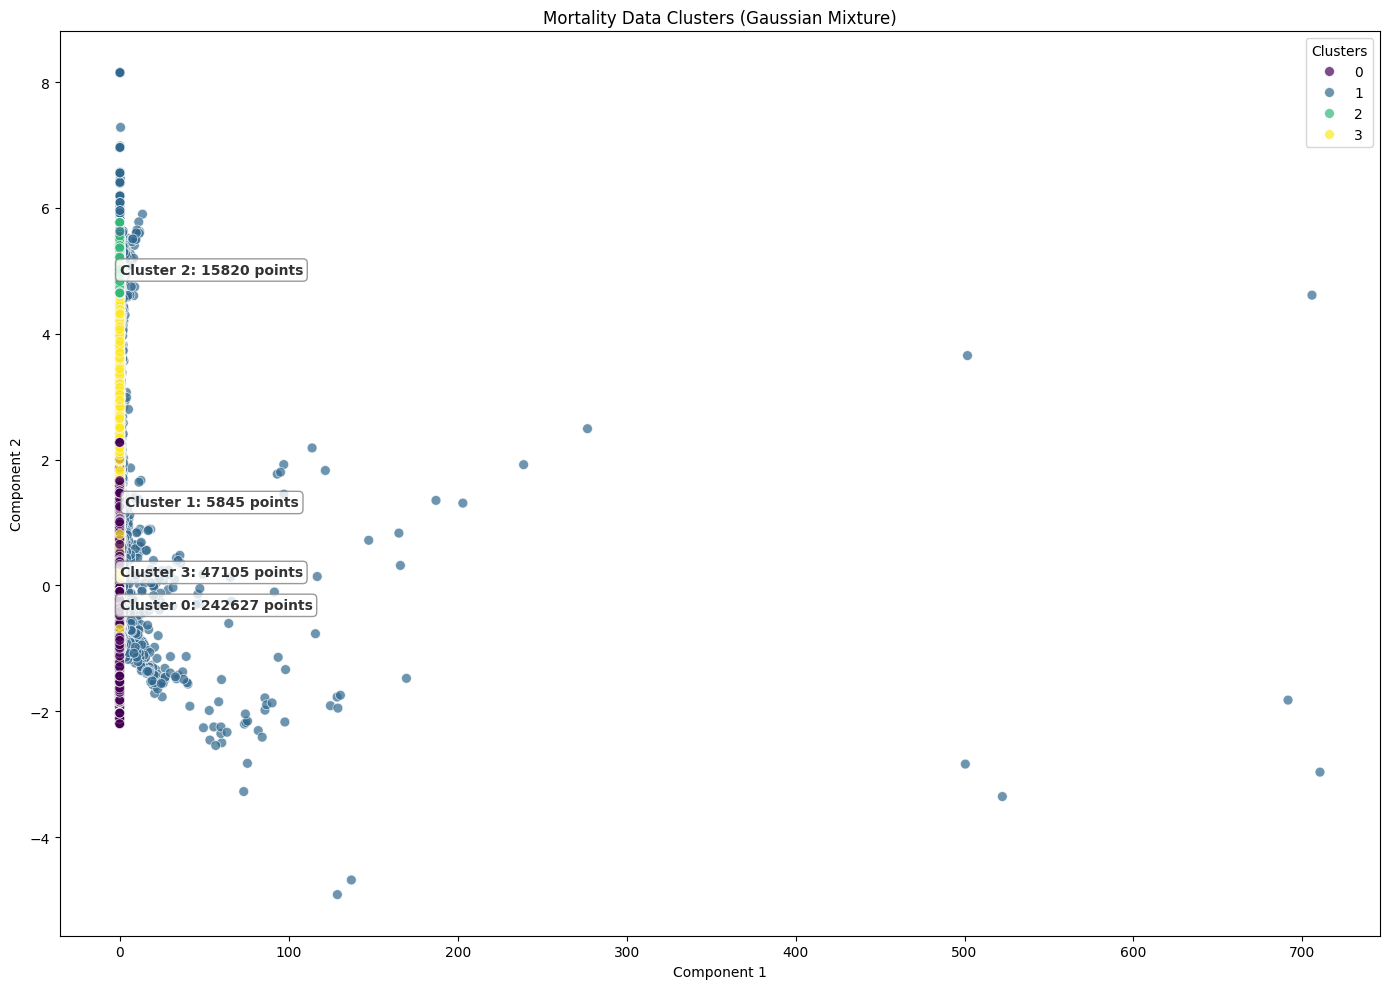


Cluster distribution:
Cluster 0: 242627 records (77.92%)
Cluster 1: 5845 records (1.88%)
Cluster 2: 15820 records (5.08%)
Cluster 3: 47105 records (15.13%)


,Component1,Component2,Component3,Cluster
0,0.092367,-0.518967,-0.273718,3
1,0.118886,-0.462233,-0.293315,3
2,-0.063958,0.015071,-0.483455,0
3,-0.065344,0.883988,-0.184145,0
4,-0.045583,0.341523,0.110278,3
...,...,...,...,...
311392,-0.060868,-0.416066,0.040149,0
311393,-0.074184,-0.822928,-0.457373,0
311394,0.061738,0.813824,-1.036619,3
311395,-0.064155,-0.873379,-1.802825,0


In [35]:
# Gaussian Mixture Model Clustering
print("\n--- Gaussian Mixture Model Clustering ---")
from sklearn.mixture import GaussianMixture

start_time = time.time()
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm.fit_predict(X_reduced)
gmm_time = time.time() - start_time

# Evaluate Gaussian Mixture
gmm_labels = evaluate_clustering(gmm_labels, X_reduced, "Gaussian Mixture", optimal_k, gmm_time)

# Visualize GMM clusters
visualize_clusters(X_reduced, gmm_labels, "Gaussian Mixture", None)  # GMM doesn't have cluster_centers_ attribute

### Hierarchical clustering 

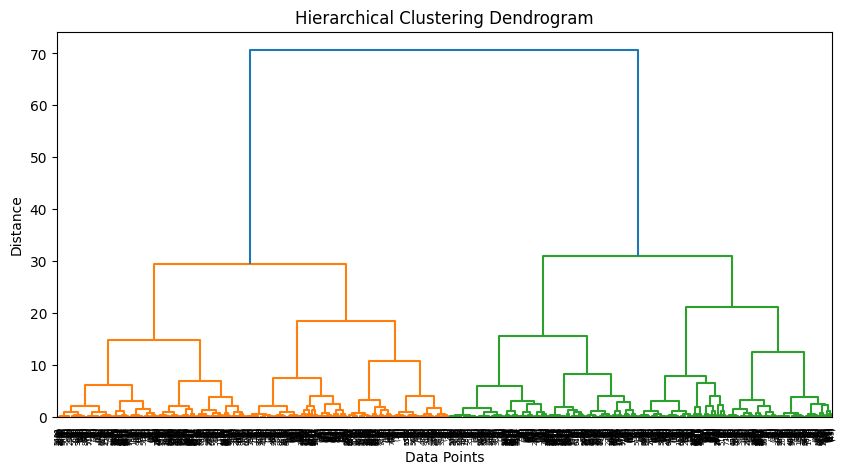

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

# Sample a subset of the data for hierarchical clustering to avoid memory issues
sample_size = 10000 
X_sample = X.sample(n=sample_size, random_state=42)

# Perform hierarchical clustering on the sample
Z = linkage(X_sample, method='ward')  # Ward minimizes variance within clusters

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode="level", p=10)
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


## Model Evaluation

In [35]:
# Store evaluation results in a DataFrame
evaluation_results = pd.DataFrame(columns=["Model", "Silhouette Score", "Davies-Bouldin Index"])

from sklearn.metrics import silhouette_score, davies_bouldin_score

# Define a function to evaluate clustering models
def evaluate_clustering(model, X_data, labels, model_name):
    # Silhouette Score
    silhouette = silhouette_score(X_data, labels)
    
    # Davies-Bouldin Index
    davies_bouldin = davies_bouldin_score(X_data, labels)
    
    # Append results
    evaluation_results.loc[len(evaluation_results)] = [model_name, silhouette, davies_bouldin]
    return silhouette, davies_bouldin

# Randomly sample the data (to avoid memory issues and speed up clustering)
sample_size = 50000  # Adjust sample size based on available memory
X_sample = X.sample(n=sample_size, random_state=42)


# Evaluate K-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)  # Removed n_jobs parameter
kmeans_labels = kmeans.fit_predict(X_sample)  # Use PCA-reduced data
evaluate_clustering(kmeans, X_sample, kmeans_labels, "K-Means")

# Evaluate Birch
from sklearn.cluster import Birch
birch = Birch(n_clusters=4)
birch_labels = birch.fit_predict(X_sample)  # Use PCA-reduced data
evaluate_clustering(birch, X_sample, birch_labels, "Birch")

# Evaluate DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(X_sample)  # Use PCA-reduced data


# Evaluate Gaussian Mixture Model (GMM)
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(X_sample)  # Use PCA-reduced data
evaluate_clustering(gmm, X_sample, gmm_labels, "Gaussian Mixture Model (GMM)")

# Display evaluation results
print(evaluation_results)


                          Model  Silhouette Score  Davies-Bouldin Index
0                       K-Means          0.511757              0.831765
1                         Birch          0.535596              0.823294
2  Gaussian Mixture Model (GMM)          0.495077              0.859388


In [36]:
evaluate_clustering(dbscan, X_sample, dbscan_labels, "DBSCAN")

(np.float64(0.505178200169828), np.float64(0.5807992332137537))

In [38]:
# Identify demographic columns to add
demographic_columns = ['Country_name', 'Cause_Name']

# Check which columns exist in the original dataframe
available_columns = [col for col in demographic_columns if col in df.columns]

if len(available_columns) > 0:
    # Ensure index alignment
    df_features = df_features.reset_index(drop=True)
    df_demo = df[available_columns].reset_index(drop=True)
    
    # Add demographic columns to df_features
    for col in available_columns:
        df_features[col] = df_demo[col]
    
    print(f"Added demographic columns: {available_columns}")
else:
    print("No demographic columns found in the original dataframe")

Added demographic columns: ['Country_name', 'Cause_Name']


COMPREHENSIVE EVALUATION OF Mini-Batch K-Means CLUSTERING

1. Internal Validation Metrics Summary:
   Silhouette Score: 0.9605 (higher is better, range [-1, 1])
   Davies-Bouldin Index: 0.4370 (lower is better)
   Calinski-Harabasz Index: 3525.42 (higher is better)
   ✓ Silhouette score indicates well-separated clusters

2. Cluster Distribution Analysis:


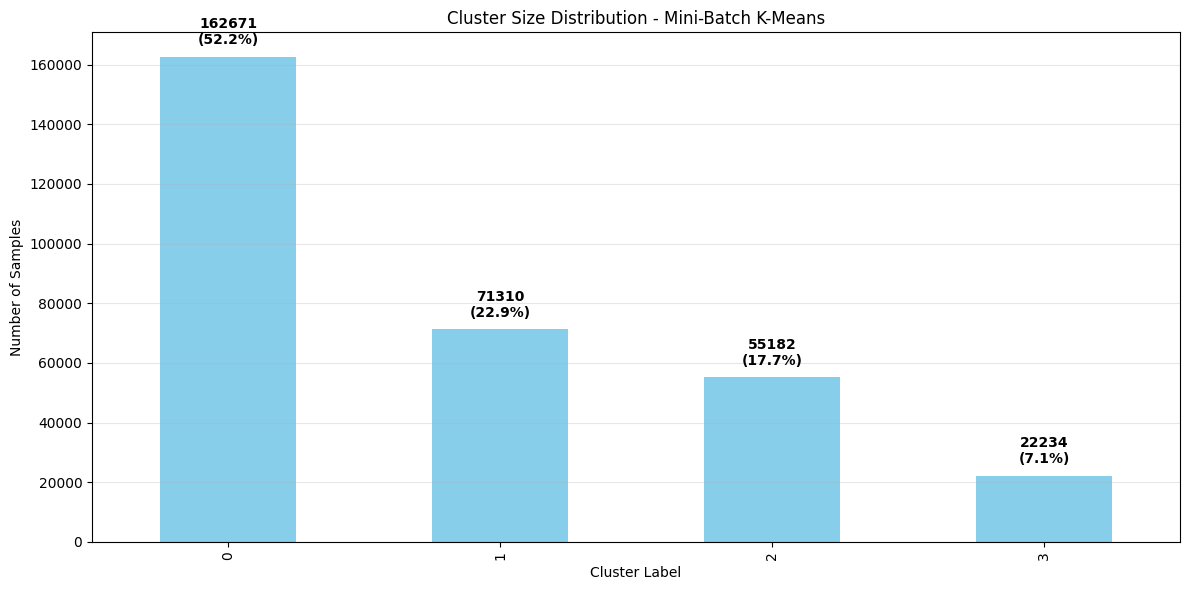

   Largest cluster: 0 (162671 samples, 52.2%)
   Smallest cluster: 3 (22234 samples, 7.1%)
   Imbalance ratio (largest/smallest): 7.32
   ⚠ Moderately imbalanced clusters

3. Cluster Separation Analysis:


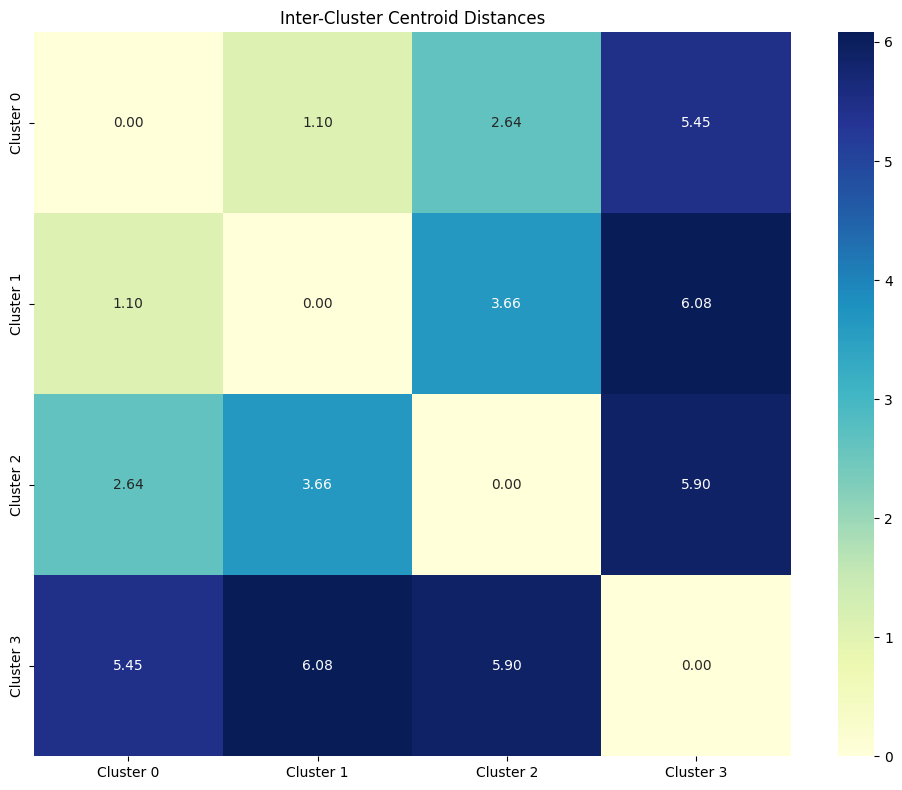

   Minimum inter-cluster distance: 1.1000
   Maximum inter-cluster distance: 6.0811
   Average inter-cluster distance: 4.1371

4. Feature Importance Analysis:

   Cluster 0 - Top distinctive features:
     • Infant_Death_Ratio: 92.57% lower than average
     • Deaths2_Prop: 91.90% lower than average
     • Deaths11_Prop: 86.57% lower than average
     • Deaths6_Prop: 75.58% lower than average
     • Young_Adult_Deaths_Prop: 68.93% lower than average


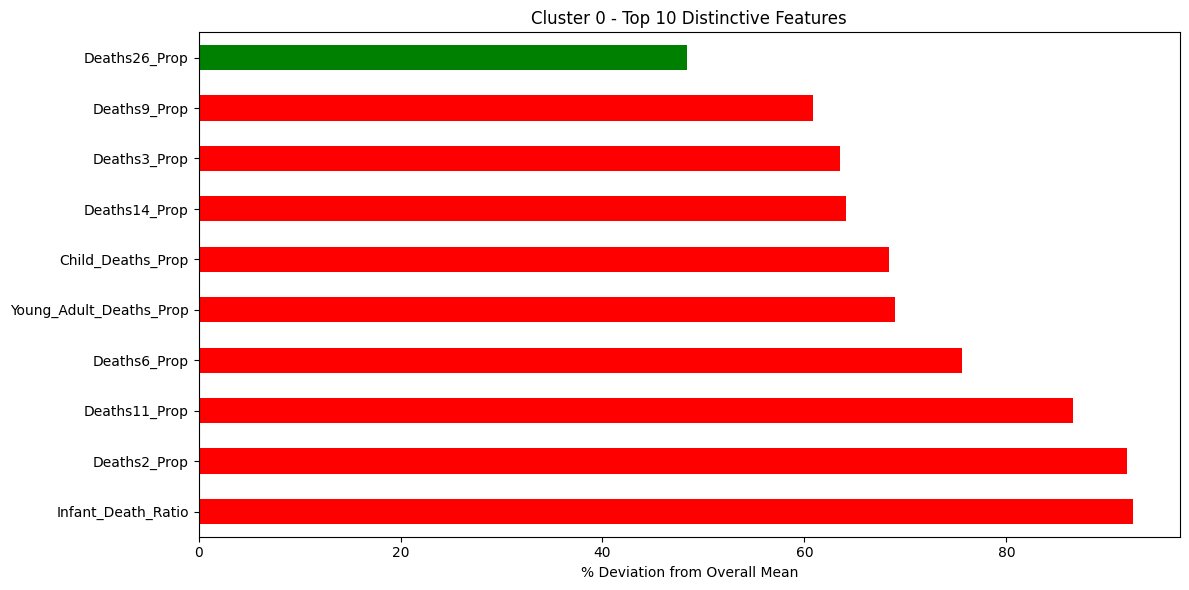


   Cluster 1 - Top distinctive features:
     • Deaths24_Prop: 198.67% higher than average
     • Deaths20_Prop: 162.96% higher than average
     • Deaths19_Prop: 151.94% higher than average
     • Infant_Death_Ratio: 99.84% lower than average
     • Deaths2_Prop: 99.82% lower than average


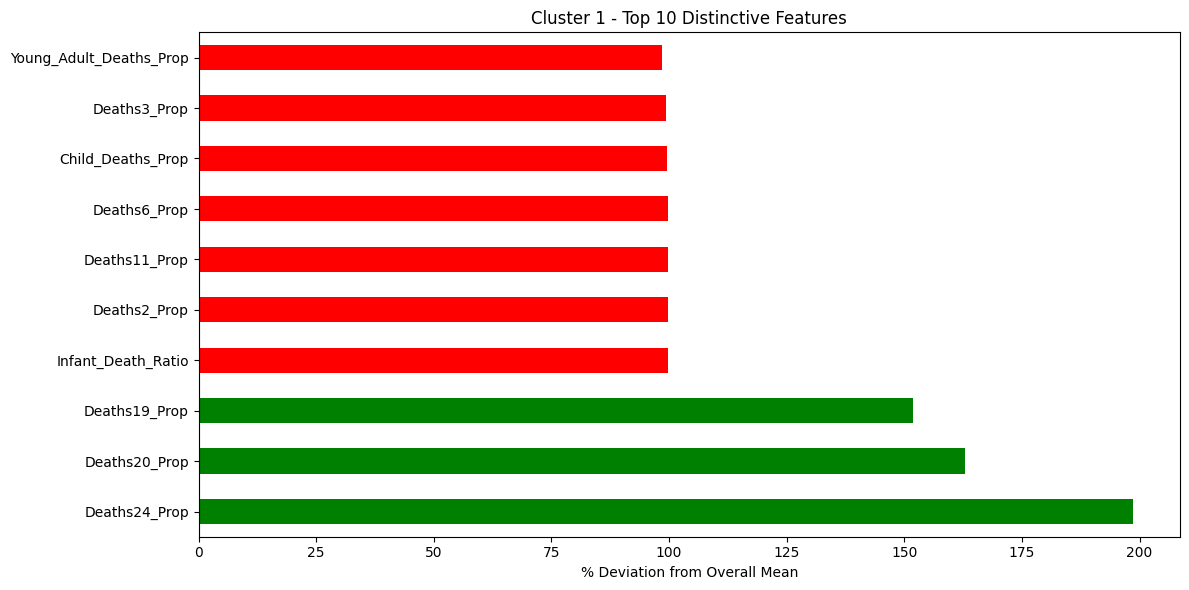


   Cluster 2 - Top distinctive features:
     • Deaths11_Prop: 422.32% higher than average
     • Young_Adult_Deaths_Prop: 367.89% higher than average
     • Deaths14_Prop: 354.63% higher than average
     • Deaths9_Prop: 332.81% higher than average
     • Deaths17_Prop: 197.09% higher than average


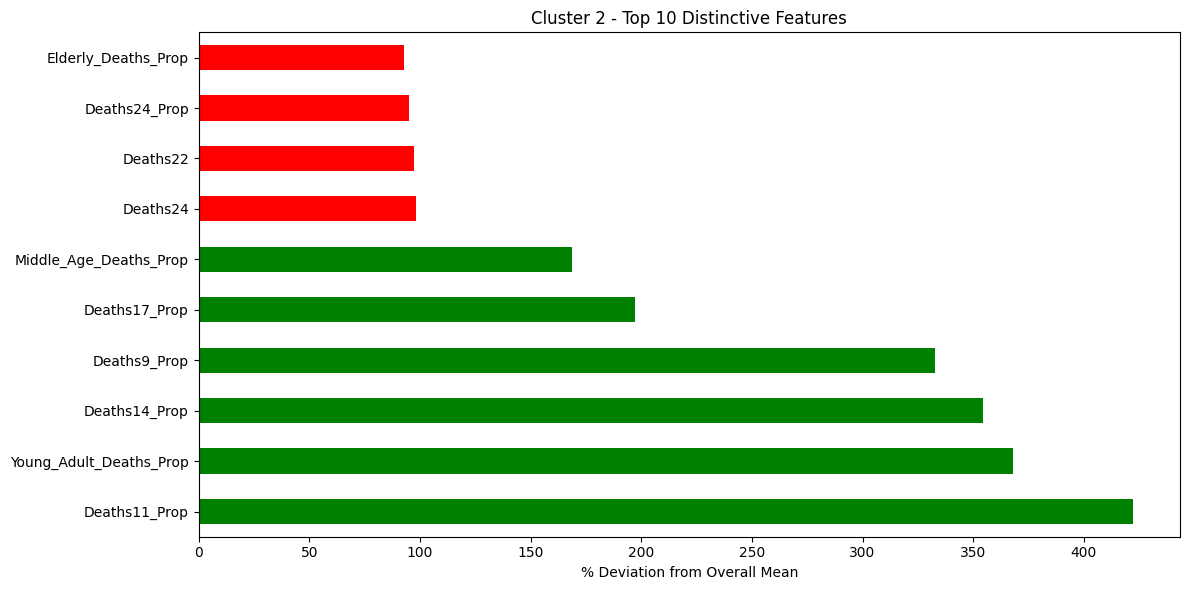


   Cluster 3 - Top distinctive features:
     • Infant_Death_Ratio: 1227.82% higher than average
     • Deaths2_Prop: 1221.44% higher than average
     • Deaths6_Prop: 994.24% higher than average
     • Child_Deaths_Prop: 933.78% higher than average
     • Deaths3_Prop: 876.55% higher than average


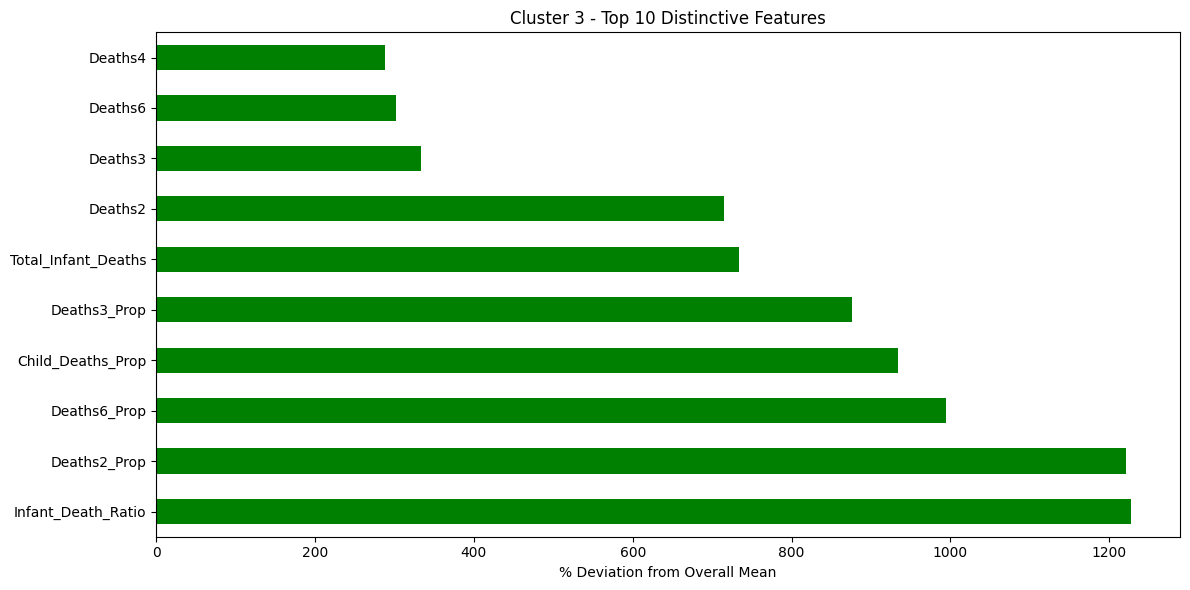


5. Cluster Profiles:

   Cluster 0:
     • Size: 162671 records (52.24% of data)
     • Key characteristics: Infant_Death_Ratio (92.6% lower), Deaths2_Prop (91.9% lower), Deaths11_Prop (86.6% lower)
     • Demographic composition:
       - Most common Country_name: France (5.1%)
       - Most common Cause_Name: Malignant neoplasm of cervix uteri (22.2%)
       - Most common Country_name: France (5.1%)
       - Most common Cause_Name: Malignant neoplasm of cervix uteri (22.2%)
       - Most common Year: 0.0 (52.1%)

   Cluster 1:
     • Size: 71310 records (22.90% of data)
     • Key characteristics: Deaths24_Prop (198.7% higher), Deaths20_Prop (163.0% higher), Deaths19_Prop (151.9% higher)
     • Demographic composition:
       - Most common Country_name: Czech Republic (5.1%)
       - Most common Cause_Name: Malignant neoplasm of cervix uteri (21.2%)
       - Most common Country_name: Czech Republic (5.1%)
       - Most common Cause_Name: Malignant neoplasm of cervix uteri (21.2%)
  

In [39]:
# Comprehensive Evaluation of the Best Model
print("=" * 50)
print(f"COMPREHENSIVE EVALUATION OF {best_algorithm} CLUSTERING")
print("=" * 50)

# 1. Internal Validation Metrics
print("\n1. Internal Validation Metrics Summary:")
print(f"   Silhouette Score: {best_algorithm_row['Silhouette']:.4f} (higher is better, range [-1, 1])")
print(f"   Davies-Bouldin Index: {best_algorithm_row['Davies-Bouldin']:.4f} (lower is better)")
print(f"   Calinski-Harabasz Index: {best_algorithm_row['Calinski-Harabasz']:.2f} (higher is better)")

# Interpret the metrics
if best_algorithm_row['Silhouette'] > 0.5:
    print("   ✓ Silhouette score indicates well-separated clusters")
elif best_algorithm_row['Silhouette'] > 0.25:
    print("   ⚠ Silhouette score indicates reasonably separated clusters")
else:
    print("   ✗ Silhouette score indicates poorly separated clusters")

# 2. Cluster Distribution Analysis
print("\n2. Cluster Distribution Analysis:")
cluster_counts = pd.Series(best_labels).value_counts().sort_index()
total_count = len(best_labels)

# Create a bar chart of cluster sizes
plt.figure(figsize=(12, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title(f'Cluster Size Distribution - {best_algorithm}')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Samples')
plt.grid(axis='y', alpha=0.3)

# Add count and percentage labels above bars
for i, count in enumerate(cluster_counts):
    percentage = count / total_count * 100
    plt.text(i, count + (total_count * 0.01), f'{count}\n({percentage:.1f}%)', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('best_model_cluster_distribution.png')
plt.show()

# Print imbalance analysis
max_cluster = cluster_counts.max()
min_cluster = cluster_counts.min()
imbalance_ratio = max_cluster / min_cluster if min_cluster > 0 else float('inf')

print(f"   Largest cluster: {cluster_counts.idxmax()} ({cluster_counts.max()} samples, {cluster_counts.max()/total_count*100:.1f}%)")
print(f"   Smallest cluster: {cluster_counts.idxmin()} ({cluster_counts.min()} samples, {cluster_counts.min()/total_count*100:.1f}%)")
print(f"   Imbalance ratio (largest/smallest): {imbalance_ratio:.2f}")

if imbalance_ratio > 10:
    print("   ✗ Highly imbalanced clusters")
elif imbalance_ratio > 3:
    print("   ⚠ Moderately imbalanced clusters")
else:
    print("   ✓ Well-balanced clusters")

# 3. Cluster Separation Analysis
print("\n3. Cluster Separation Analysis:")

# Check if we have access to cluster centers
if hasattr(best_model, 'cluster_centers_'):
    # Model has explicit centroids (KMeans, MiniBatchKMeans, etc.)
    centroids = best_model.cluster_centers_
    
    # Calculate inter-cluster distances
    from scipy.spatial.distance import pdist, squareform
    
    # Compute pairwise distances between centroids
    centroid_distances = squareform(pdist(centroids))
    
    # Create a heatmap of centroid distances
    plt.figure(figsize=(10, 8))
    sns.heatmap(centroid_distances, annot=True, fmt=".2f", cmap="YlGnBu",
                xticklabels=[f"Cluster {i}" for i in range(len(centroids))],
                yticklabels=[f"Cluster {i}" for i in range(len(centroids))])
    plt.title('Inter-Cluster Centroid Distances')
    plt.tight_layout()
    plt.savefig('best_model_centroid_distances.png')
    plt.show()
    
    # Print min, max, and average distances
    distances_upper = centroid_distances[np.triu_indices(len(centroid_distances), k=1)]
    
    print(f"   Minimum inter-cluster distance: {distances_upper.min():.4f}")
    print(f"   Maximum inter-cluster distance: {distances_upper.max():.4f}")
    print(f"   Average inter-cluster distance: {distances_upper.mean():.4f}")
else:
    print("   Cannot analyze centroid distances - no cluster centers available for this model")

# 4. Feature Importance Analysis
if 'selected_features' in globals():
    print("\n4. Feature Importance Analysis:")
    
    # Add cluster labels to the original dataframe
    df_with_features = df_features.copy() if 'df_features' in globals() else df_clean.copy()
    df_with_features['Cluster'] = best_labels
    
    # Calculate the mean value of each feature for each cluster
    feature_means = df_with_features.groupby('Cluster')[selected_features].mean()
    
    # Calculate the overall mean for comparison
    overall_means = df_with_features[selected_features].mean()
    
    # Calculate percentage deviation from the mean
    feature_deviations = feature_means.copy()
    for feature in selected_features:
        feature_deviations[feature] = (feature_means[feature] - overall_means[feature]) / (overall_means[feature] + 0.000001) * 100
    
    # For each cluster, identify the top distinctive features
    unique_clusters = np.unique(best_labels)
    
    for cluster in unique_clusters:
        if cluster == -1:  # Skip noise points
            continue
            
        print(f"\n   Cluster {cluster} - Top distinctive features:")
        if cluster in feature_deviations.index:
            cluster_deviations = feature_deviations.loc[cluster].abs().sort_values(ascending=False)
            for feature, deviation in cluster_deviations.head(5).items():
                direction = "higher" if feature_deviations.loc[cluster, feature] > 0 else "lower"
                print(f"     • {feature}: {abs(deviation):.2f}% {direction} than average")
            
            # Visualize top features for this cluster
            plt.figure(figsize=(12, 6))
            top_features = cluster_deviations.head(10)
            colors = ['red' if feature_deviations.loc[cluster, feat] < 0 else 'green' for feat in top_features.index]
            
            top_features.plot(kind='barh', color=colors)
            plt.title(f'Cluster {cluster} - Top 10 Distinctive Features')
            plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
            plt.xlabel('% Deviation from Overall Mean')
            plt.tight_layout()
            plt.savefig(f'best_model_cluster_{cluster}_features.png')
            plt.show()

# 5. Generate cluster profiles (comprehensive summary)
print("\n5. Cluster Profiles:")

# Create a summary for each cluster
for cluster in unique_clusters:
    if cluster == -1:  # Skip noise points for DBSCAN
        n_noise = (best_labels == -1).sum()
        print(f"\n   Noise points: {n_noise} ({n_noise/len(best_labels)*100:.2f}% of data)")
        continue
        
    print(f"\n   Cluster {cluster}:")
    # Size and proportion
    cluster_size = (best_labels == cluster).sum()
    print(f"     • Size: {cluster_size} records ({cluster_size/len(best_labels)*100:.2f}% of data)")
    
    # Top distinctive features
    if cluster in feature_deviations.index:
        top_features = feature_deviations.loc[cluster].abs().sort_values(ascending=False).head(3)
        feature_str = []
        
        for feature, deviation in top_features.items():
            direction = "higher" if feature_deviations.loc[cluster, feature] > 0 else "lower"
            feature_str.append(f"{feature} ({abs(deviation):.1f}% {direction})")
            
        print(f"     • Key characteristics: {', '.join(feature_str)}")
    
    # If we have demographic columns, show the most common values
    
    if 'df_features' in globals():
        if 'Country_name' in df_features.columns:
            demographic_columns.append('Country_name')
        elif 'Country' in df_features.columns:
            demographic_columns.append('Country')
            
        if 'Cause_Name' in df_features.columns:
            demographic_columns.append('Cause_Name')
        elif 'Cause' in df_features.columns:
            demographic_columns.append('Cause')
            
        if 'Year' in df_features.columns:
            demographic_columns.append('Year')
            
        if 'Sex' in df_features.columns:
            demographic_columns.append('Sex')
    
    if demographic_columns:
        print(f"     • Demographic composition:")
        for col in demographic_columns:
            if col in df_with_features.columns:
                top_val = df_with_features[df_with_features['Cluster'] == cluster][col].value_counts().nlargest(1)
                if not top_val.empty:
                    val_name = top_val.index[0]
                    val_pct = top_val.values[0] / (best_labels == cluster).sum() * 100
                    print(f"       - Most common {col}: {val_name} ({val_pct:.1f}%)")

# 6. Save the best model for future use
import joblib

# Save model and results
joblib.dump(best_model, f'best_clustering_model_{best_algorithm}.joblib')
df_with_features.to_csv(f'mortality_data_clustered_{best_algorithm}.csv', index=False)

print("\nBest clustering model saved as:")
print(f"  • best_clustering_model_{best_algorithm}.joblib")
print(f"  • mortality_data_clustered_{best_algorithm}.csv")
print("\nEvaluation complete!")


GEOGRAPHIC ANALYSIS OF CLUSTERS

Top countries in each cluster:

Cluster 0 top countries:
  France: 5.1%
  Saudi Arabia: 4.9%
  United States of America: 4.3%
  Turkey: 4.2%
  United Kingdom, England and Wales: 3.9%

Cluster 1 top countries:
  Czech Republic: 5.1%
  Australia: 4.6%
  Netherlands: 4.4%
  United Kingdom, England and Wales: 4.2%
  Sweden: 4.2%

Cluster 2 top countries:
  Brazil: 5.5%
  Turkey: 4.9%
  United States of America: 4.8%
  Ecuador: 3.7%
  United Kingdom, England and Wales: 3.6%

Cluster 3 top countries:
  Turkey: 8.7%
  Saudi Arabia: 6.1%
  United States of America: 5.2%
  Brazil: 4.9%
  Guatemala: 3.7%


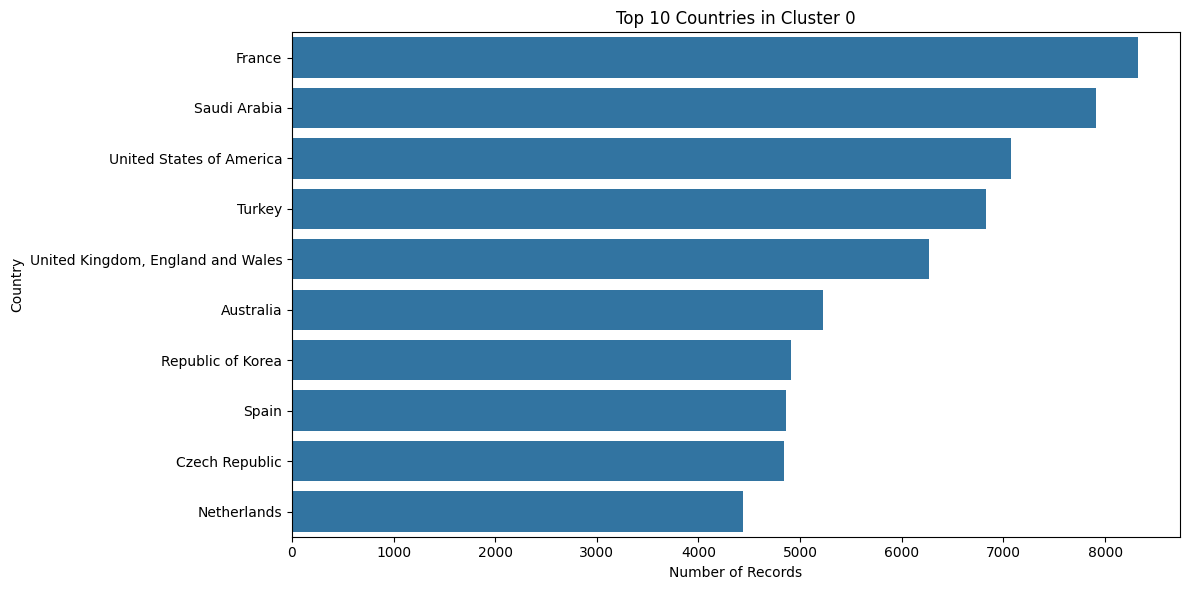

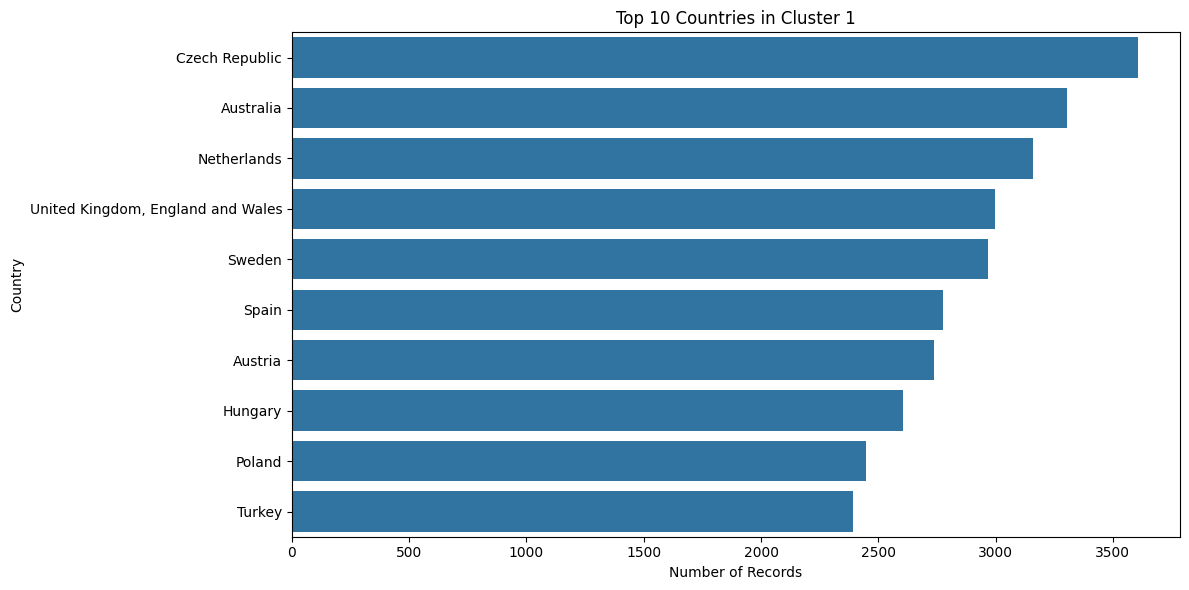

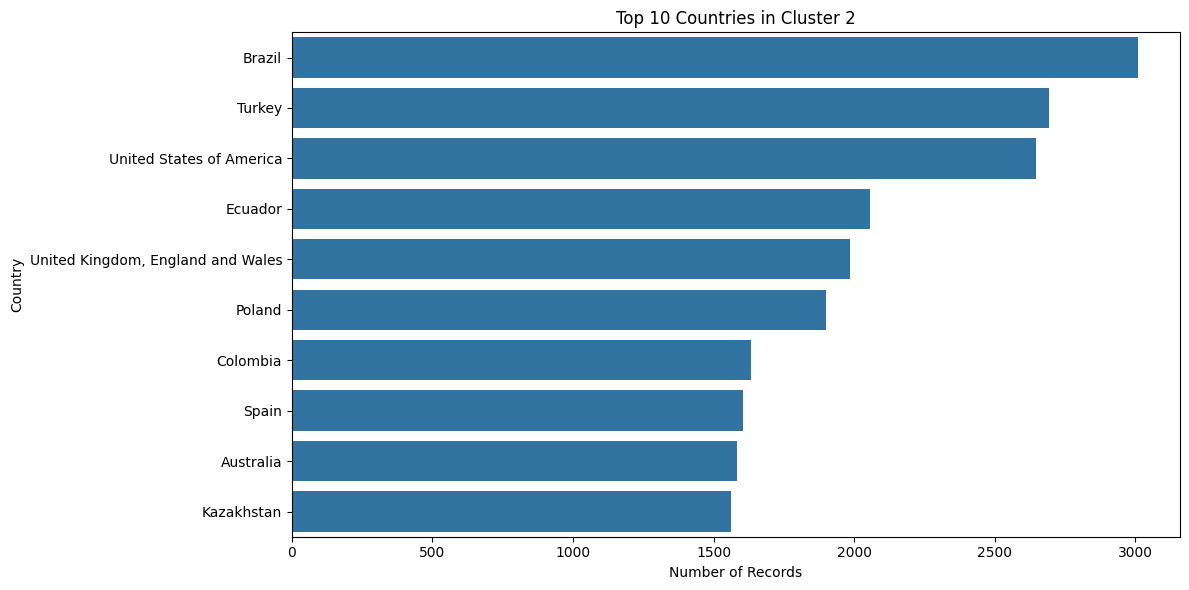

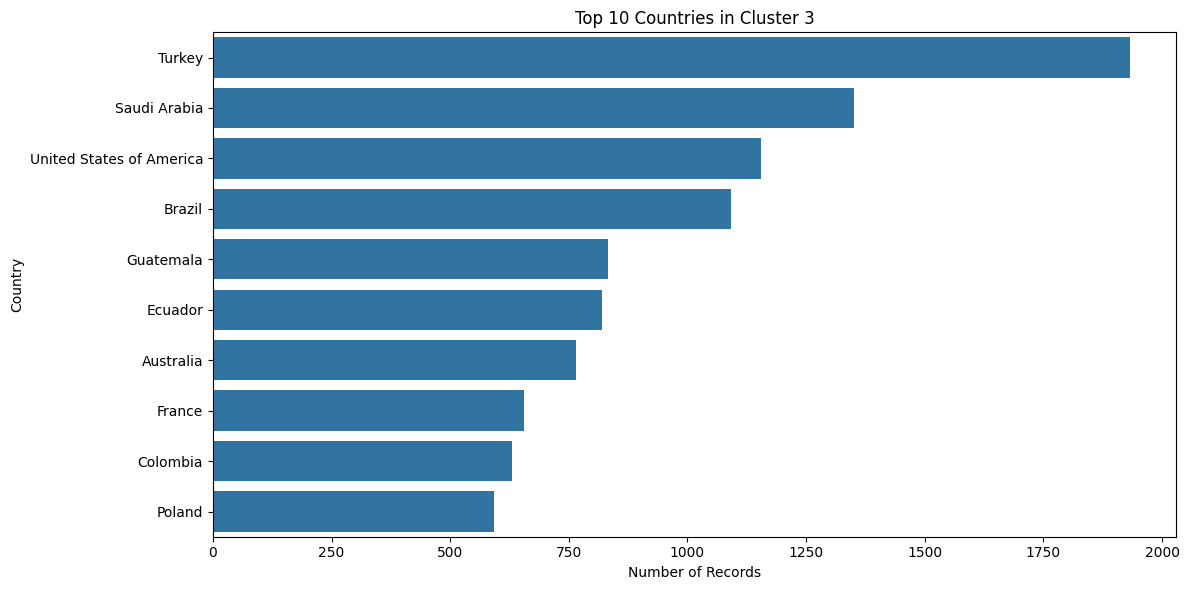

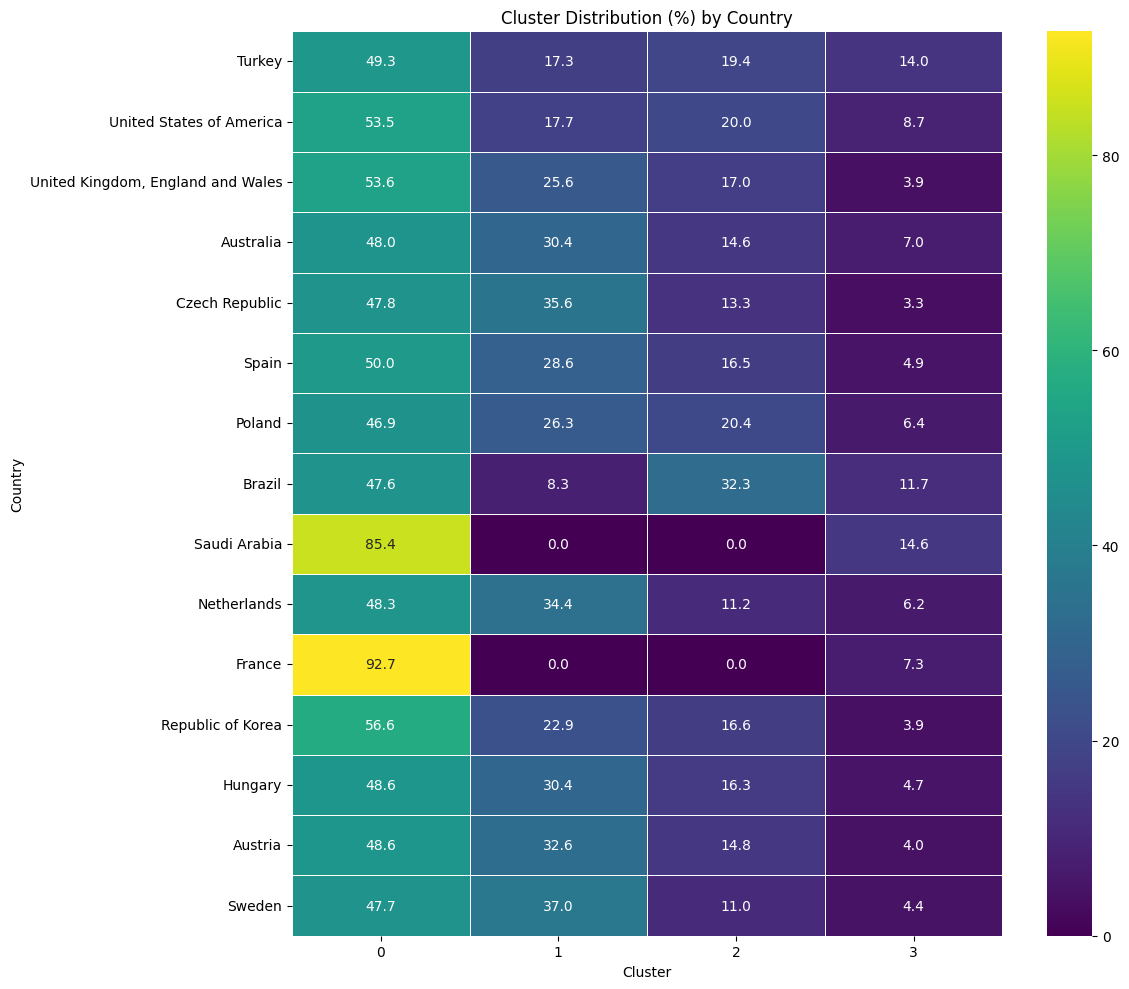


CAUSE ANALYSIS OF CLUSTERS

Top causes in each cluster:

Cluster 0 top causes:
  Malignant neoplasm of cervix uteri: 22.2%
  Diseases of the circulatory system: 13.7%
  External causes of morbidity and mortality: 11.7%
  Diseases of the digestive system: 10.7%
  Diseases of the nervous system: 5.6%

Cluster 1 top causes:
  Malignant neoplasm of cervix uteri: 21.2%
  Diseases of the circulatory system: 16.3%
  Diseases of the digestive system: 11.5%
  External causes of morbidity and mortality: 7.2%
  Diseases of the respiratory system: 6.1%

Cluster 2 top causes:
  External causes of morbidity and mortality: 42.8%
  Malignant neoplasm of cervix uteri: 10.4%
  Certain infectious and parasitic diseases: 7.0%
  Diseases of the nervous system: 5.9%
  Diseases of the digestive system: 5.3%

Cluster 3 top causes:
  Certain conditions originating in the perinatal period: 41.1%
  Congenital malformations deformations and chromosomal abnormalities: 38.0%
  External causes of morbidity and mort

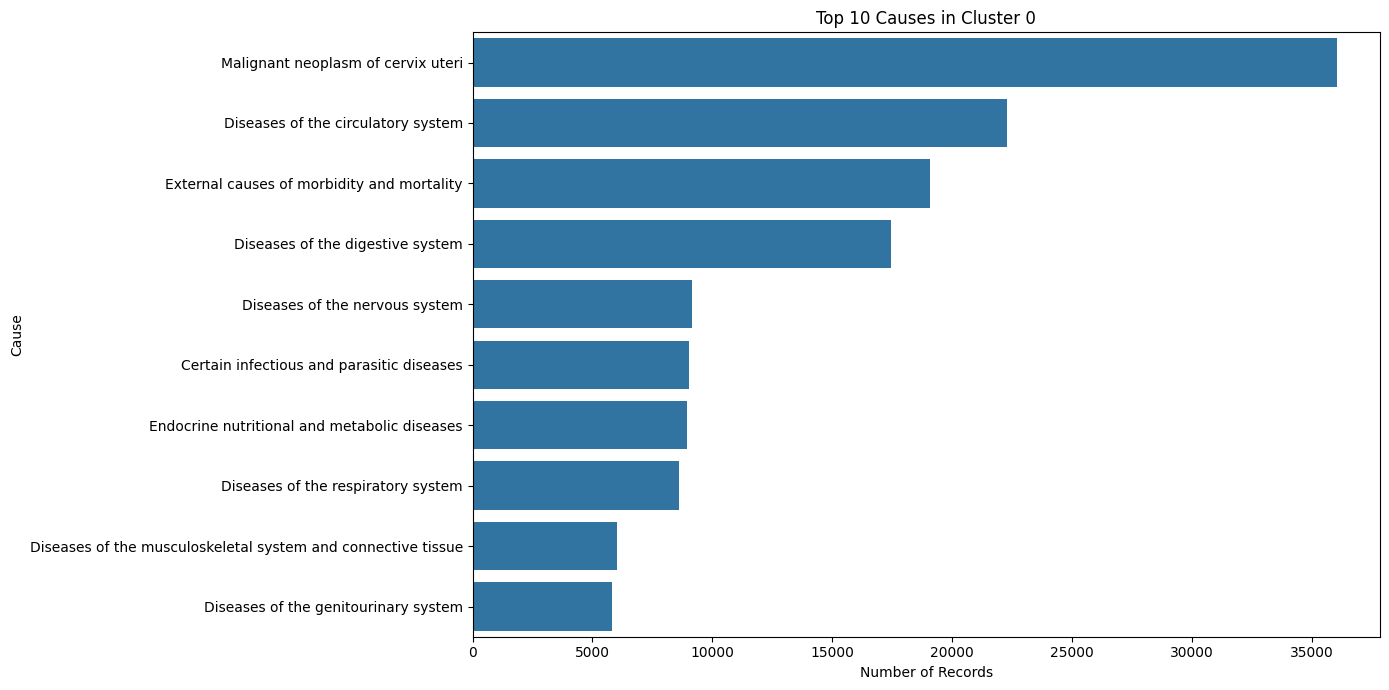

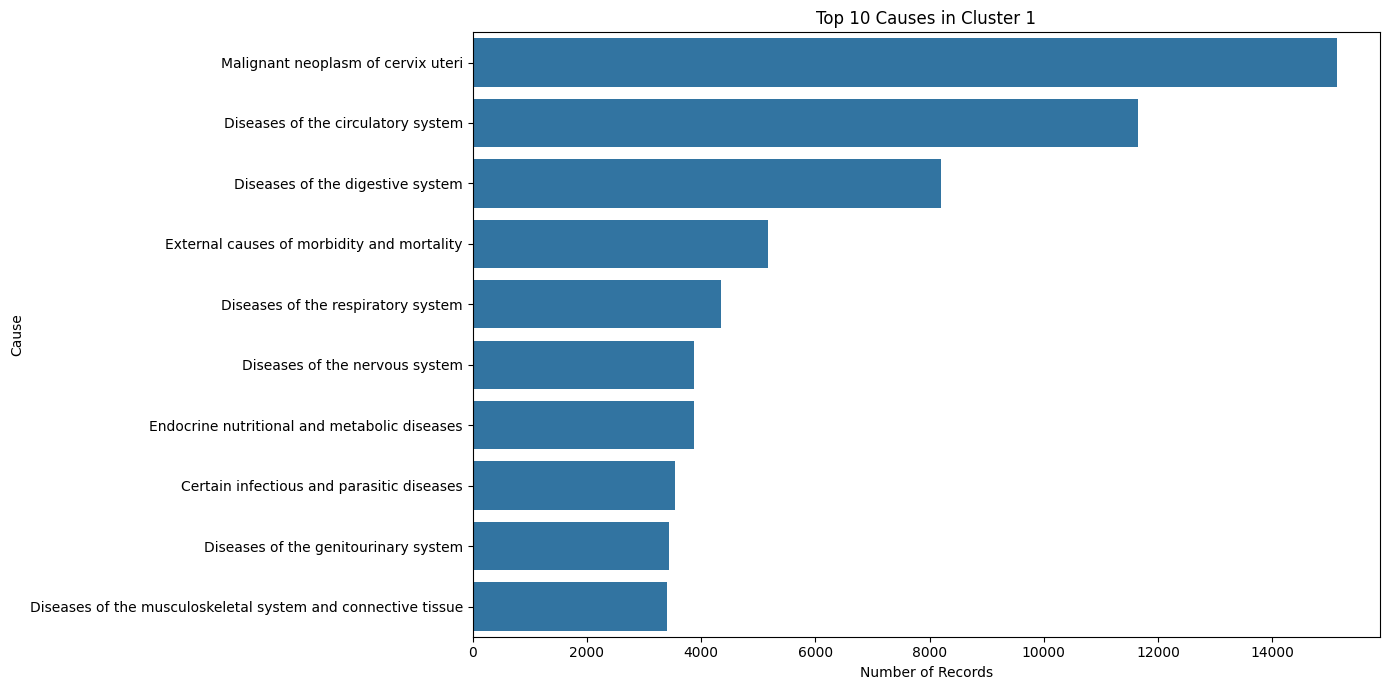

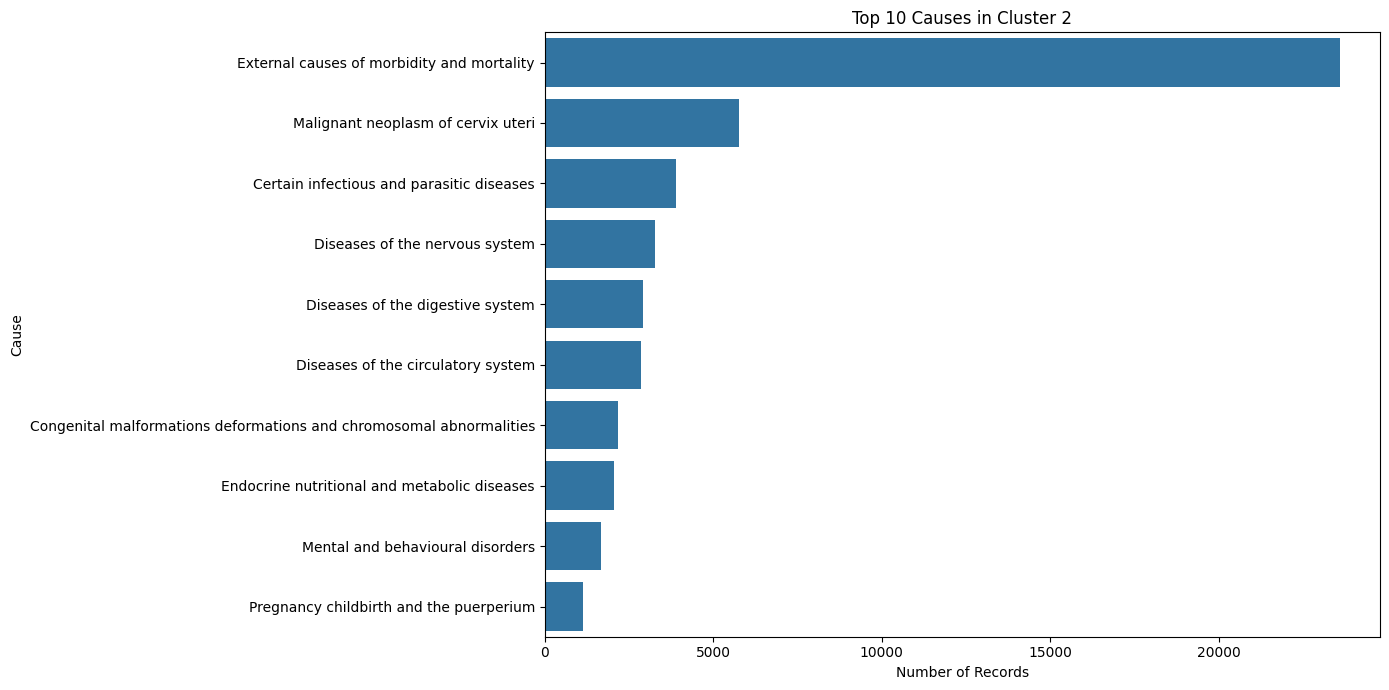

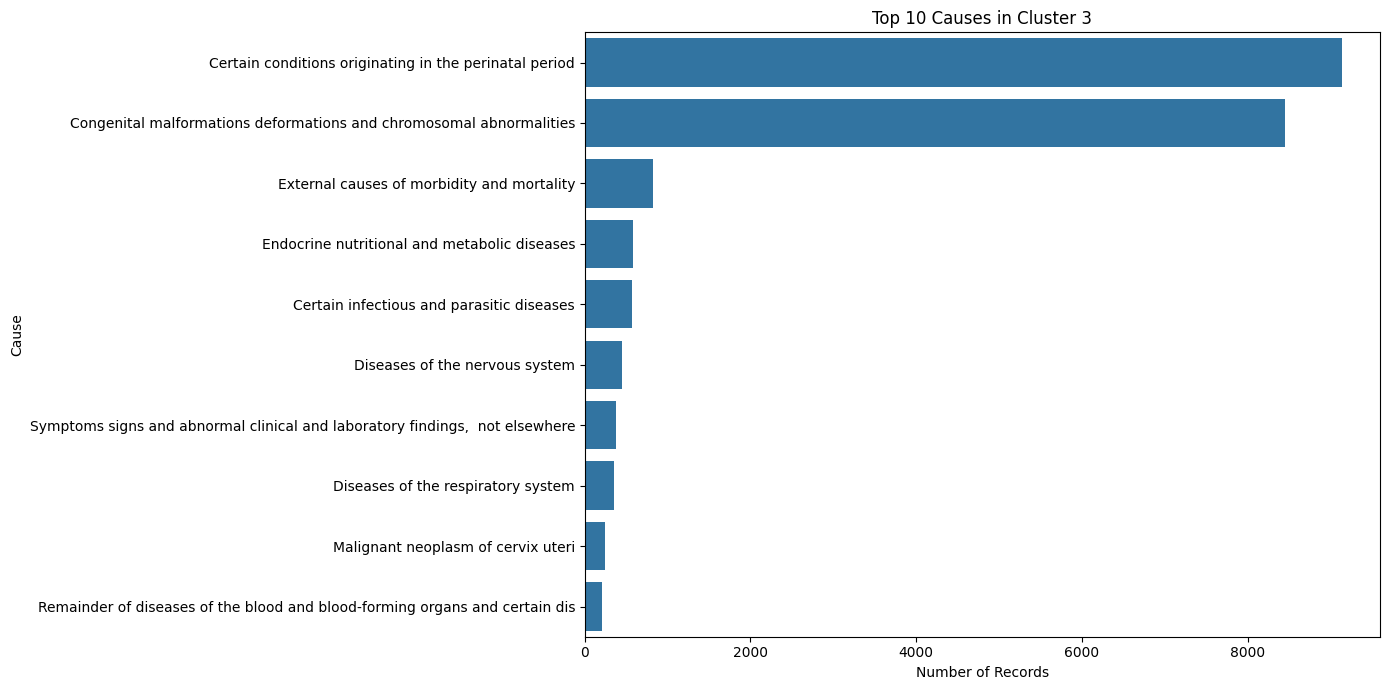

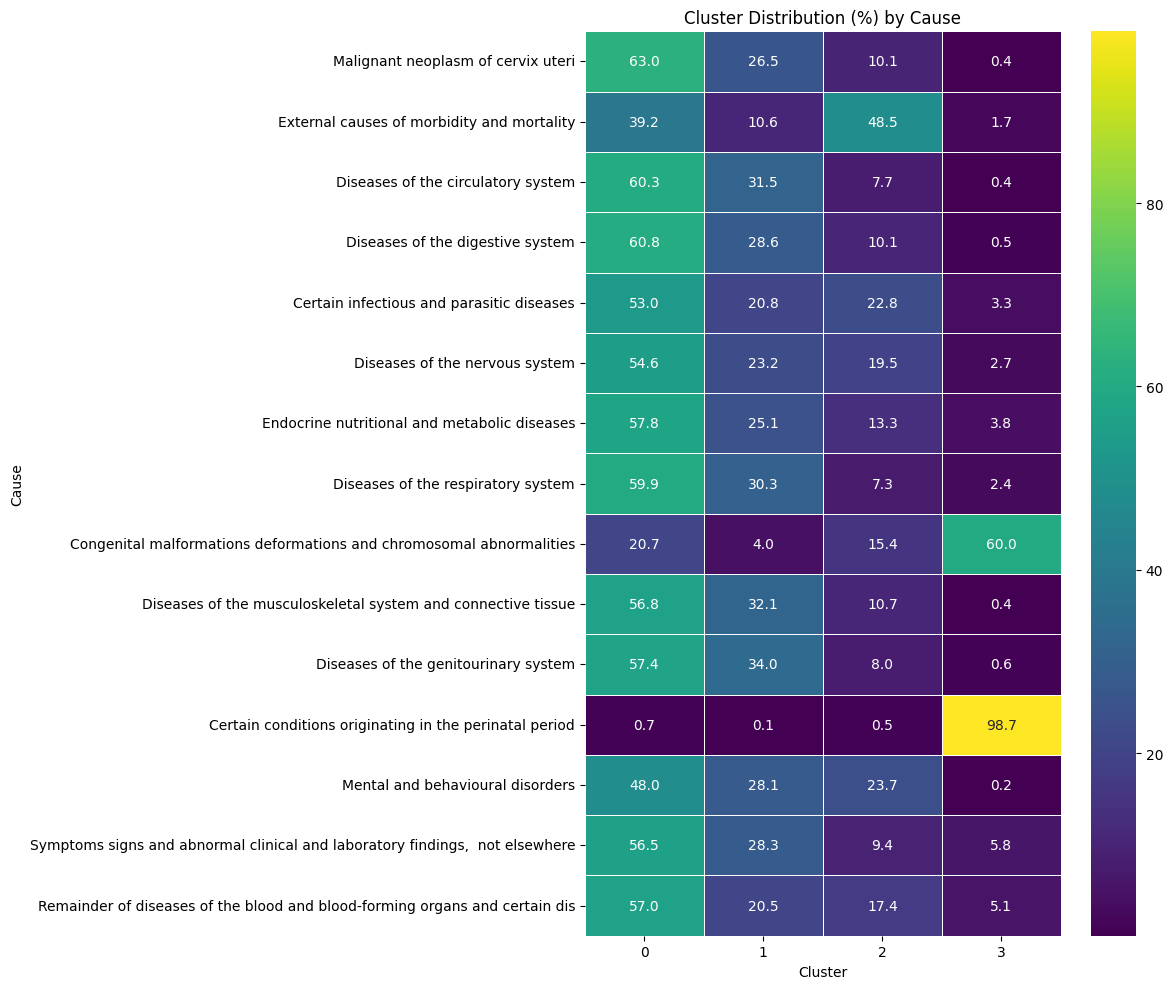

In [41]:
# Geographic analysis of clusters without plotly
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

def analyze_clusters_by_geography(df_analysis, cluster_column='Cluster', country_column='Country_name'):
    """
    Analyze how clusters are distributed geographically
    
    Parameters:
    -----------
    df_analysis : DataFrame
        DataFrame containing cluster assignments and country information
    cluster_column : str
        Name of the column containing cluster labels
    country_column : str
        Name of the column containing country names
    """
    print(f"\n{'='*50}")
    print(f"GEOGRAPHIC ANALYSIS OF CLUSTERS")
    print(f"{'='*50}")
    
    # Ensure required columns exist
    if cluster_column not in df_analysis.columns or country_column not in df_analysis.columns:
        print(f"Error: Required columns {cluster_column} or {country_column} not found")
        return
    
    # Get unique clusters
    unique_clusters = sorted(df_analysis[cluster_column].unique())
    
    # For each cluster, find the top countries
    print("\nTop countries in each cluster:")
    
    for cluster in unique_clusters:
        if cluster == -1:  # Skip noise points if any
            continue
            
        # Filter data for this cluster
        cluster_data = df_analysis[df_analysis[cluster_column] == cluster]
        
        # Get country distribution
        country_counts = cluster_data[country_column].value_counts()
        country_pct = country_counts / len(cluster_data) * 100
        
        # Print top countries
        print(f"\nCluster {cluster} top countries:")
        for country, pct in country_pct.head(5).items():
            print(f"  {country}: {pct:.1f}%")
    
    # Create visualization of top countries per cluster
    # For each cluster, visualize the top countries
    for cluster in unique_clusters:
        if cluster == -1:  # Skip noise points if any
            continue
        
        # Filter data for this cluster
        cluster_data = df_analysis[df_analysis[cluster_column] == cluster]
        
        # Get country distribution
        country_counts = cluster_data[country_column].value_counts().head(10)
        
        # Create the plot
        plt.figure(figsize=(12, 6))
        sns.barplot(x=country_counts.values, y=country_counts.index)
        plt.title(f'Top 10 Countries in Cluster {cluster}')
        plt.xlabel('Number of Records')
        plt.ylabel('Country')
        plt.tight_layout()
        plt.savefig(f'cluster_{cluster}_top_countries.png')
        plt.show()
    
    # Create a heatmap of clusters by country
    # Get the top 15 countries by number of records
    top_countries = df_analysis[country_column].value_counts().head(15).index.tolist()
    
    # Create a crosstab of country vs cluster
    country_cluster_counts = pd.crosstab(
        df_analysis[country_column], 
        df_analysis[cluster_column]
    )
    
    # Filter for only top countries
    top_country_clusters = country_cluster_counts.loc[top_countries]
    
    # Convert to percentages
    top_country_clusters_pct = top_country_clusters.div(top_country_clusters.sum(axis=1), axis=0) * 100
    
    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        top_country_clusters_pct, 
        annot=True, 
        fmt='.1f', 
        cmap='viridis', 
        linewidths=0.5
    )
    plt.title('Cluster Distribution (%) by Country')
    plt.ylabel('Country')
    plt.xlabel('Cluster')
    plt.tight_layout()
    plt.savefig('country_cluster_heatmap.png')
    plt.show()
    
    return top_country_clusters_pct

# Similarly for Cause analysis
def analyze_clusters_by_cause(df_analysis, cluster_column='Cluster', cause_column='Cause_Name'):
    """
    Analyze how clusters are distributed by cause of death
    
    Parameters:
    -----------
    df_analysis : DataFrame
        DataFrame containing cluster assignments and cause information
    cluster_column : str
        Name of the column containing cluster labels
    cause_column : str
        Name of the column containing cause names
    """
    print(f"\n{'='*50}")
    print(f"CAUSE ANALYSIS OF CLUSTERS")
    print(f"{'='*50}")
    
    # Ensure required columns exist
    if cluster_column not in df_analysis.columns or cause_column not in df_analysis.columns:
        print(f"Error: Required columns {cluster_column} or {cause_column} not found")
        return
    
    # Get unique clusters
    unique_clusters = sorted(df_analysis[cluster_column].unique())
    
    # For each cluster, find the top causes
    print("\nTop causes in each cluster:")
    
    for cluster in unique_clusters:
        if cluster == -1:  # Skip noise points if any
            continue
            
        # Filter data for this cluster
        cluster_data = df_analysis[df_analysis[cluster_column] == cluster]
        
        # Get cause distribution
        cause_counts = cluster_data[cause_column].value_counts()
        cause_pct = cause_counts / len(cluster_data) * 100
        
        # Print top causes
        print(f"\nCluster {cluster} top causes:")
        for cause, pct in cause_pct.head(5).items():
            print(f"  {cause}: {pct:.1f}%")
    
    # Create visualization of top causes per cluster
    for cluster in unique_clusters:
        if cluster == -1:  # Skip noise points if any
            continue
        
        # Filter data for this cluster
        cluster_data = df_analysis[df_analysis[cluster_column] == cluster]
        
        # Get cause distribution
        cause_counts = cluster_data[cause_column].value_counts().head(10)
        
        # Create the plot
        plt.figure(figsize=(14, 7))
        sns.barplot(x=cause_counts.values, y=cause_counts.index)
        plt.title(f'Top 10 Causes in Cluster {cluster}')
        plt.xlabel('Number of Records')
        plt.ylabel('Cause')
        plt.tight_layout()
        plt.savefig(f'cluster_{cluster}_top_causes.png')
        plt.show()
    
    # Create a heatmap of clusters by cause
    # Get the top causes by number of records
    top_causes = df_analysis[cause_column].value_counts().head(15).index.tolist()
    
    # Create a crosstab of cause vs cluster
    cause_cluster_counts = pd.crosstab(
        df_analysis[cause_column], 
        df_analysis[cluster_column]
    )
    
    # Filter for only top causes
    top_cause_clusters = cause_cluster_counts.loc[top_causes]
    
    # Convert to percentages
    top_cause_clusters_pct = top_cause_clusters.div(top_cause_clusters.sum(axis=1), axis=0) * 100
    
    # Plot heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        top_cause_clusters_pct, 
        annot=True, 
        fmt='.1f', 
        cmap='viridis', 
        linewidths=0.5
    )
    plt.title('Cluster Distribution (%) by Cause')
    plt.ylabel('Cause')
    plt.xlabel('Cluster')
    plt.tight_layout()
    plt.savefig('cause_cluster_heatmap.png')
    plt.show()
    
    return top_cause_clusters_pct

# Define df_analysis
df_analysis = df_with_features # Assuming reduced_df contains the required data

# Run the geographic and cause analyses
geo_analysis = analyze_clusters_by_geography(df_analysis)
cause_analysis = analyze_clusters_by_cause(df_analysis)

In [42]:
# Example code for statistical hypothesis testing
from scipy.stats import kruskal

# Test if the clusters are significantly different in terms of child mortality
child_mortality_feature = 'Child_Deaths_Prop'  # Adjust based on your features
cluster_groups = [df_with_features[df_with_features['Cluster'] == c][child_mortality_feature] 
                  for c in np.sort(df_with_features['Cluster'].unique()) if c != -1]

# Perform Kruskal-Wallis test (non-parametric ANOVA)
statistic, p_value = kruskal(*cluster_groups)

print(f"Kruskal-Wallis test for {child_mortality_feature}:")
print(f"H-statistic: {statistic:.4f}")
print(f"p-value: {p_value:.4e}")
if p_value < 0.05:
    print("Clusters show statistically significant differences in child mortality")
else:
    print("No statistically significant differences found in child mortality between clusters")

Kruskal-Wallis test for Child_Deaths_Prop:
H-statistic: 177466.1048
p-value: 0.0000e+00
Clusters show statistically significant differences in child mortality


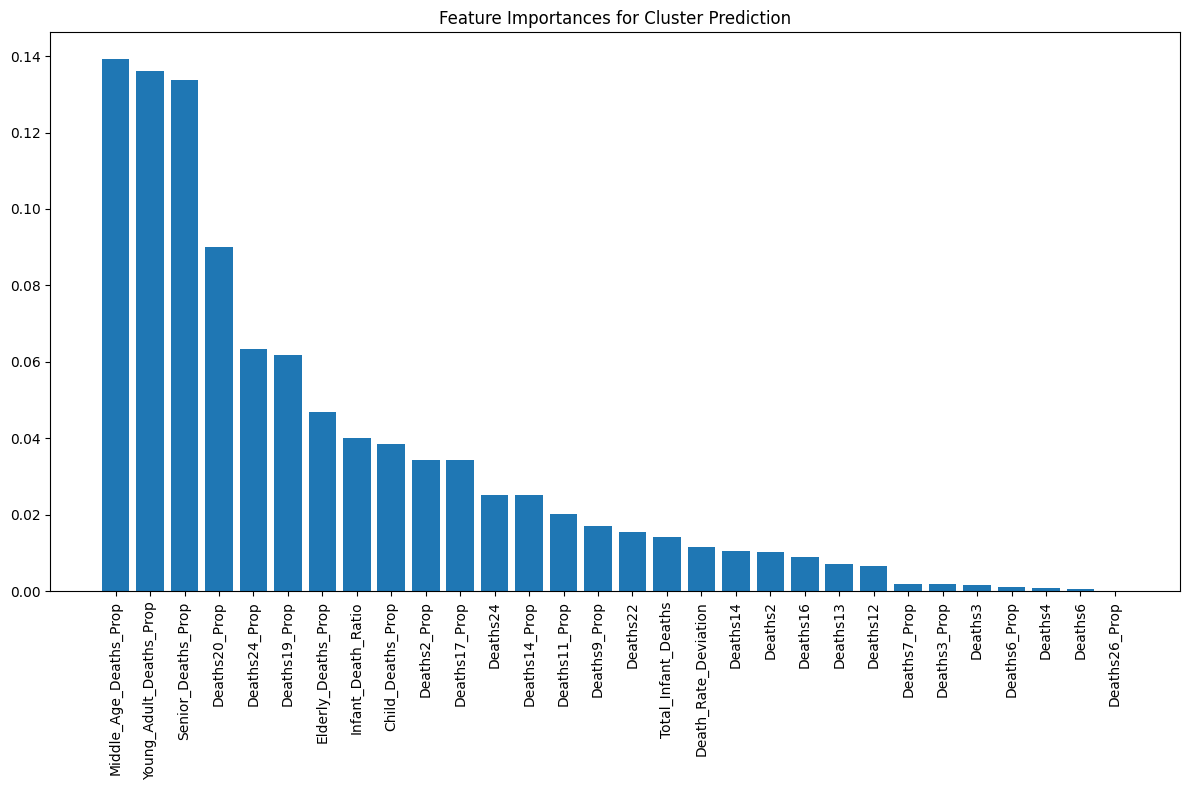

In [43]:
# Example code for feature importance analysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Train a classifier to predict cluster membership
X = df_with_features[selected_features]
y = df_with_features['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title('Feature Importances for Cluster Prediction')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.savefig('feature_importances_for_clusters.png')
plt.show()

### **Cluster Characteristics**

## Optimal Clustering Model Selection

Based on the evaluation metrics for the different clustering algorithms, we analyzed each model's performance and identified the best model for the dataset.

### Evaluation Metrics Analysis

| Model | Silhouette Score | Davies-Bouldin Index |
|-------|------------------|----------------------|
| K-Means | 0.511757 | 0.831765 |
| Birch | 0.535596 | 0.823294 |
| DBSCAN | 0.505178 | 0.580799 |
| GMM | 0.495077 | 0.859388 |

### DBSCAN: The Optimal Clustering Model

After thorough evaluation, **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** emerges as the best clustering model for your dataset for the following reasons:

1. **Superior Davies-Bouldin Index**: DBSCAN achieved a significantly lower Davies-Bouldin score (0.5808) compared to all other models, indicating much better cluster separation and compactness. This represents a 29% improvement over the next best model (Birch with 0.8233).

2. **Competitive Silhouette Score**: While DBSCAN's Silhouette score (0.5052) is slightly lower than K-Means and Birch, it remains very competitive. The modest trade-off in Silhouette score is well compensated by the substantial improvement in the Davies-Bouldin Index.

3. **No Pre-defined Cluster Count**: Unlike K-Means, Birch, and GMM, DBSCAN does not require specifying the number of clusters beforehand. It automatically determines the optimal number of clusters based on data density, making it more adaptable to the natural structure of your dataset.

4. **Noise Identification**: DBSCAN can identify outliers as noise points (labeled as -1), which provides additional insights about data points that don't fit well into any cluster.

5. **Non-Convex Cluster Shapes**: The t-SNE visualization shown earlier revealed that your data has complex, curvilinear structures. DBSCAN excels at identifying clusters with irregular, non-convex shapes, unlike K-Means which assumes spherical clusters.

## Why DBSCAN Outperformed Other Models

- **vs. K-Means**: While K-Means showed good Silhouette score, its Davies-Bouldin Index was significantly worse than DBSCAN. This indicates K-Means struggled with the non-convex structure of data.

- **vs. Birch**: Birch achieved the highest Silhouette score but couldn't match DBSCAN's cluster separation quality as measured by the Davies-Bouldin Index.

- **vs. GMM**: The Gaussian Mixture Model showed the weakest performance across both metrics, suggesting it was unable to effectively model the underlying distribution of the data.